# BTK Akademi Yapay Zeka Eğitimi - Osman Batur ÇELİK

### Kütüphaneleri içe aktar

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

class Colors:
    """ ANSI color codes """
    BLACK = "\033[0;30m"
    RED = "\033[0;31m"
    GREEN = "\033[0;32m"
    BROWN = "\033[0;33m"
    BLUE = "\033[0;34m"
    PURPLE = "\033[0;35m"
    CYAN = "\033[0;36m"
    LIGHT_GRAY = "\033[0;37m"
    DARK_GRAY = "\033[1;30m"
    LIGHT_RED = "\033[1;31m"
    LIGHT_GREEN = "\033[1;32m"
    YELLOW = "\033[1;33m"
    LIGHT_BLUE = "\033[1;34m"
    LIGHT_PURPLE = "\033[1;35m"
    LIGHT_CYAN = "\033[1;36m"
    LIGHT_WHITE = "\033[1;37m"
    BOLD = "\033[1m"
    FAINT = "\033[2m"
    ITALIC = "\033[3m"
    UNDERLINE = "\033[4m"
    BLINK = "\033[5m"
    NEGATIVE = "\033[7m"
    CROSSED = "\033[9m"
    END = "\033[0m"


In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


def print_score(clf, X_train, Y_train, X_test, Y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        precision, recall, thresholds = metrics.precision_recall_curve(Y_train, pred)
        fpr, tpr, thresholds = metrics.roc_curve(Y_train, pred)
        clf_report = pd.DataFrame(classification_report(Y_train, pred, output_dict=True))
        print(Colors.BLUE + Colors.BOLD+  "Train Result:\n================================================" + Colors.END)
        print(Colors.RED + Colors.BOLD+ f"Accuracy Score: {accuracy_score(Y_train, pred) * 100:.2f}%"+ Colors.END)
        print(Colors.RED + Colors.BOLD+ f"PR AUC : {metrics.auc(recall, precision) * 100:.2f}%" + Colors.END)
        print(Colors.RED + Colors.BOLD+ f"ROC AUC Score: {metrics.auc(fpr, tpr) * 100:.2f}%" + Colors.END)
        print(Colors.BLUE + Colors.BOLD+"_______________________________________________"+ Colors.END)
        print(Colors.YELLOW + Colors.BOLD+f"CLASSIFICATION REPORT:\n{clf_report}"+ Colors.END)
        print(Colors.BLUE + Colors.BOLD+"_______________________________________________"+ Colors.END)
               
        cm =confusion_matrix(Y_train,clf.predict(X_train))
        classes = ["0","1"]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
        fig, ax = plt.subplots(figsize=(10,10))
        plt.title("Confusion Matrix ")
        disp = disp.plot(ax=ax)
        plt.show()
        
    elif train==False:
        pred = clf.predict(X_test)
        precision, recall, thresholds = metrics.precision_recall_curve(Y_test, pred)
        fpr, tpr, thresholds = metrics.roc_curve(Y_test, pred)
        clf_report = pd.DataFrame(classification_report(Y_test, pred, output_dict=True))
        print(Colors.BLUE + Colors.BOLD+ "Test Result:\n================================================"+ Colors.END)        
        print(Colors.RED + Colors.BOLD+ f"Accuracy Score: {accuracy_score(Y_test, pred) * 100:.2f}%" + Colors.END)
        print(Colors.RED + Colors.BOLD+ f"PR AUC : {metrics.auc(recall, precision) * 100:.2f}%" + Colors.END)
        print(Colors.RED + Colors.BOLD+ f"ROC AUC Score: {metrics.auc(fpr, tpr) * 100:.2f}%" + Colors.END)
        print(Colors.BLUE + Colors.BOLD+"________________________________________________"+ Colors.END)
        print(Colors.YELLOW + Colors.BOLD+f"CLASSIFICATION REPORT:\n{clf_report}"+ Colors.END)
        print(Colors.BLUE + Colors.BOLD+"________________________________________________"+ Colors.END)
        print(f"Confusion Matrix: \n {confusion_matrix(Y_test,clf.predict(X_test))}\n"+ Colors.END)
        
        cm =confusion_matrix(Y_test,clf.predict(X_test))
        classes = ["0","1"]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
        fig, ax = plt.subplots(figsize=(10,10))
        plt.title("Confusion Matrix ")
        disp = disp.plot(ax=ax)
        plt.show()

NameError: name 'y_test' is not defined

### Veri setini yükle

In [3]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

### Veri setinin stünlarını kontrol et

In [4]:
train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

### Veri tiperi

In [5]:
train.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

### Veri çıkarma

- BusinessTravel metin olarak verilmis, numerik kategorik formata dönüştürülmeli.
- Department, EducationField, MaritalStatus da oyle.
- Over18 kaldirilacak.
- EmployeeCount silinecek.
- EmployeeNumber silinecek.
- StandardHours kaldirilacak.

In [6]:
train.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,36.859694,804.922619,9.329082,2.897959,1.0,1024.346939,2.724490,65.544218,2.714286,2.058673,...,2.738946,80.0,0.801871,11.352041,2.784014,2.765306,7.034014,4.254252,2.173469,4.187925
std,9.115610,402.627249,8.109130,1.030495,0.0,606.582338,1.093398,20.202669,0.718154,1.094260,...,1.078555,0.0,0.862868,7.850857,1.267982,0.700896,6.122344,3.627904,3.217057,3.629603
min,18.000000,102.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,466.750000,2.000000,2.000000,1.0,490.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,802.000000,7.000000,3.000000,1.0,1012.500000,3.000000,65.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1163.250000,14.000000,4.000000,1.0,1570.250000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2065.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
# İstenmeyen stunların çıkarılması.
train=train.loc[:, ~train.columns.isin(['EmployeeCount', 'EmployeeNumber','StandardHours',"Over18"])]


In [8]:
train.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,36.859694,804.922619,9.329082,2.897959,2.724490,65.544218,2.714286,2.058673,2.723639,6484.924320,...,3.158163,2.738946,0.801871,11.352041,2.784014,2.765306,7.034014,4.254252,2.173469,4.187925
std,9.115610,402.627249,8.109130,1.030495,1.093398,20.202669,0.718154,1.094260,1.102100,4672.960274,...,0.365049,1.078555,0.862868,7.850857,1.267982,0.700896,6.122344,3.627904,3.217057,3.629603
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,466.750000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2902.750000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,802.000000,7.000000,3.000000,3.000000,65.000000,3.000000,2.000000,3.000000,4890.500000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1163.250000,14.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8400.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19973.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Katagorik kolonlar

In [9]:
train.describe(include=['O'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Attrition
count,1176,1176,1176,1176,1176,1176,1176,1176
unique,3,3,6,2,9,3,2,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No,No
freq,841,764,482,711,265,543,837,987


In [10]:
# Over18 çıkarma
train=train.loc[:, ~train.columns.isin(['Over18'])]


In [11]:
train.describe(include=['O'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Attrition
count,1176,1176,1176,1176,1176,1176,1176,1176
unique,3,3,6,2,9,3,2,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No,No
freq,841,764,482,711,265,543,837,987


In [12]:
train.head(1).to_dict()

{'Age': {0: 30},
 'BusinessTravel': {0: 'Travel_Rarely'},
 'DailyRate': {0: 911},
 'Department': {0: 'Research & Development'},
 'DistanceFromHome': {0: 1},
 'Education': {0: 2},
 'EducationField': {0: 'Medical'},
 'EnvironmentSatisfaction': {0: 4},
 'Gender': {0: 'Male'},
 'HourlyRate': {0: 76},
 'JobInvolvement': {0: 3},
 'JobLevel': {0: 1},
 'JobRole': {0: 'Laboratory Technician'},
 'JobSatisfaction': {0: 2},
 'MaritalStatus': {0: 'Married'},
 'MonthlyIncome': {0: 3748},
 'MonthlyRate': {0: 4077},
 'NumCompaniesWorked': {0: 1},
 'OverTime': {0: 'No'},
 'PercentSalaryHike': {0: 13},
 'PerformanceRating': {0: 3},
 'RelationshipSatisfaction': {0: 3},
 'StockOptionLevel': {0: 0},
 'TotalWorkingYears': {0: 12},
 'TrainingTimesLastYear': {0: 6},
 'WorkLifeBalance': {0: 2},
 'YearsAtCompany': {0: 12},
 'YearsInCurrentRole': {0: 8},
 'YearsSinceLastPromotion': {0: 1},
 'YearsWithCurrManager': {0: 7},
 'Attrition': {0: 'No'}}

### BusinessTravel, Department, EducationField, MaritalStatus sayısal değerlere dönüştürme.


In [13]:
# BusinessTravel

change_travel = np.unique(train["BusinessTravel"])
business_unique ={change_travel[i]: i for i in range(len(change_travel))}
train["BusinessTravel"]=train["BusinessTravel"].map(business_unique)
print(Colors.BLUE + "Business Travel : " + str(business_unique) + Colors.END)

# Department

change_deparment = np.unique(train["Department"])
department_unique ={change_deparment[i]: i for i in range(len(change_deparment))}
train["Department"]=train["Department"].map(department_unique)
print(Colors.BLUE + "Department : " + str(department_unique) + Colors.END)

# EducationField

change_education = np.unique(train["EducationField"])
education_unique ={change_education[i]: i for i in range(len(change_education))}
train["EducationField"]=train["EducationField"].map(education_unique)
print(Colors.BLUE + "EducationField : " + str(education_unique) + Colors.END)

# MaritalStatus

change_martial = np.unique(train["MaritalStatus"])
martial_unique ={change_martial[i]: i for i in range(len(change_martial))}
train["MaritalStatus"]=train["MaritalStatus"].map(martial_unique)
print(Colors.BLUE + "MaritalStatus : " + str(martial_unique) + Colors.END)


train.head(1).to_dict()


Business Travel : {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
Department : {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
EducationField : {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}
MaritalStatus : {'Divorced': 0, 'Married': 1, 'Single': 2}


{'Age': {0: 30},
 'BusinessTravel': {0: 2},
 'DailyRate': {0: 911},
 'Department': {0: 1},
 'DistanceFromHome': {0: 1},
 'Education': {0: 2},
 'EducationField': {0: 3},
 'EnvironmentSatisfaction': {0: 4},
 'Gender': {0: 'Male'},
 'HourlyRate': {0: 76},
 'JobInvolvement': {0: 3},
 'JobLevel': {0: 1},
 'JobRole': {0: 'Laboratory Technician'},
 'JobSatisfaction': {0: 2},
 'MaritalStatus': {0: 1},
 'MonthlyIncome': {0: 3748},
 'MonthlyRate': {0: 4077},
 'NumCompaniesWorked': {0: 1},
 'OverTime': {0: 'No'},
 'PercentSalaryHike': {0: 13},
 'PerformanceRating': {0: 3},
 'RelationshipSatisfaction': {0: 3},
 'StockOptionLevel': {0: 0},
 'TotalWorkingYears': {0: 12},
 'TrainingTimesLastYear': {0: 6},
 'WorkLifeBalance': {0: 2},
 'YearsAtCompany': {0: 12},
 'YearsInCurrentRole': {0: 8},
 'YearsSinceLastPromotion': {0: 1},
 'YearsWithCurrManager': {0: 7},
 'Attrition': {0: 'No'}}

In [14]:
# BusinessTravel

change_travel = np.unique(train["BusinessTravel"])
business_unique ={change_travel[i]: i for i in range(len(change_travel))}
train["BusinessTravel"]=train["BusinessTravel"].map(business_unique)

# Department

change_deparment = np.unique(train["Department"])
department_unique ={change_deparment[i]: i for i in range(len(change_deparment))}
train["Department"]=train["Department"].map(department_unique)

# EducationField

change_education = np.unique(train["EducationField"])
education_unique ={change_education[i]: i for i in range(len(change_education))}
train["EducationField"]=train["EducationField"].map(education_unique)

# MaritalStatus

change_martial = np.unique(train["MaritalStatus"])
martial_unique ={change_martial[i]: i for i in range(len(change_martial))}
train["MaritalStatus"]=train["MaritalStatus"].map(martial_unique)


### Katagorik verilerin görselleştirilmesi

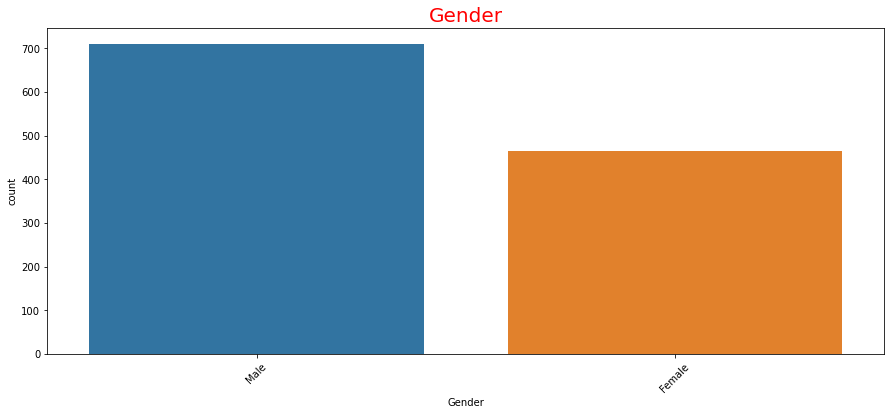

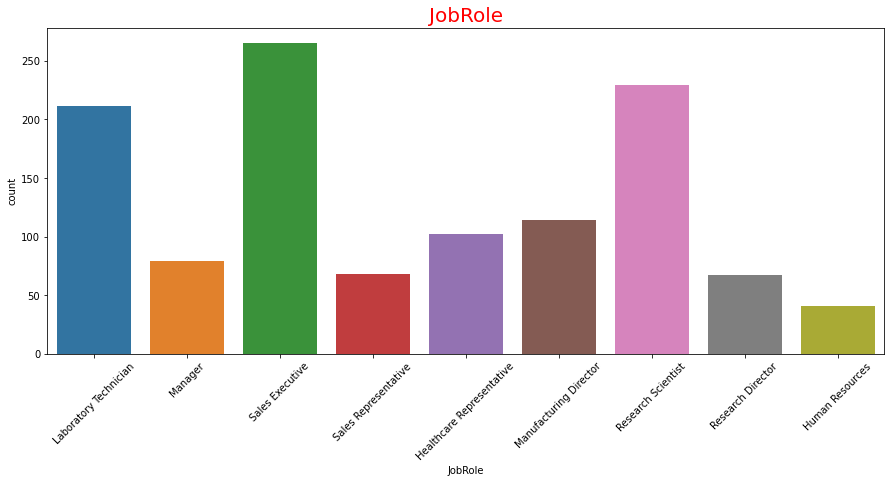

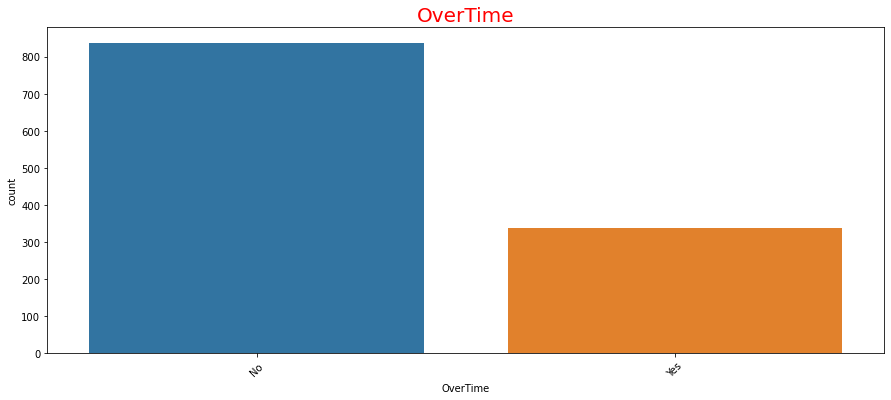

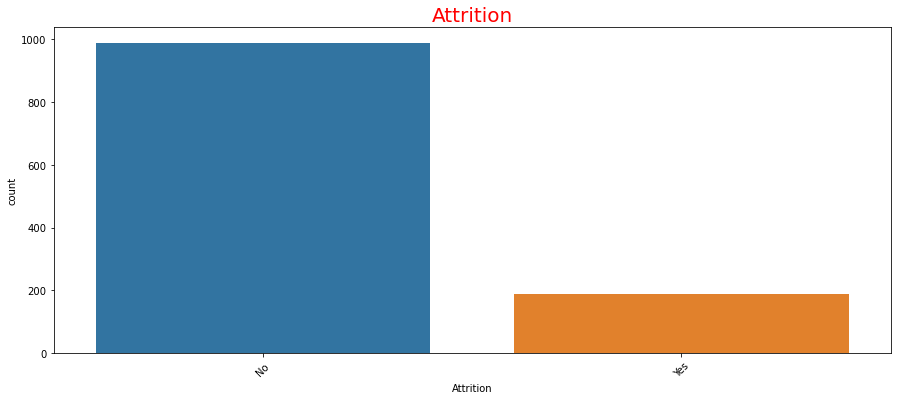

In [15]:
train_objects = train.dtypes[train.dtypes=="O"].index.tolist()
for i in range(len(train_objects)):
    plt.figure(i,figsize=(15,6))
    plt.title(train_objects[i],color="red",fontsize=20)
    plt.xticks(rotation = 45)
    sns.countplot(x=train_objects[i], data=train)

### Sayısal verilerin göselleştirilmesi

C:\Users\osman\AppData\Local\Temp/ipykernel_13556/910744521.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i,figsize=(15,6))


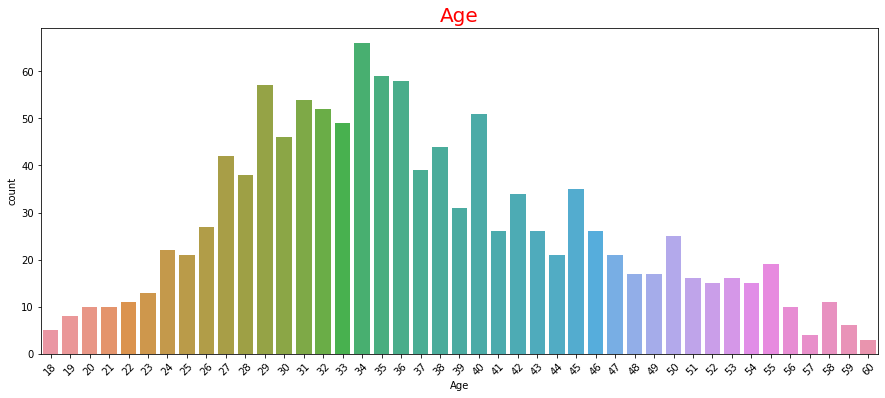

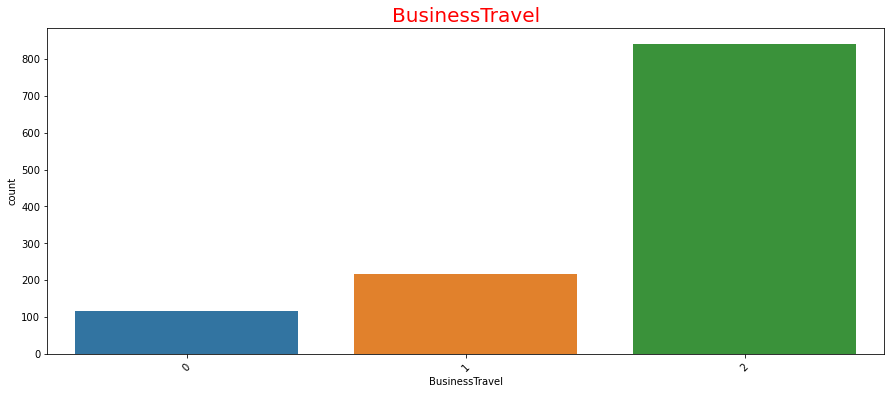

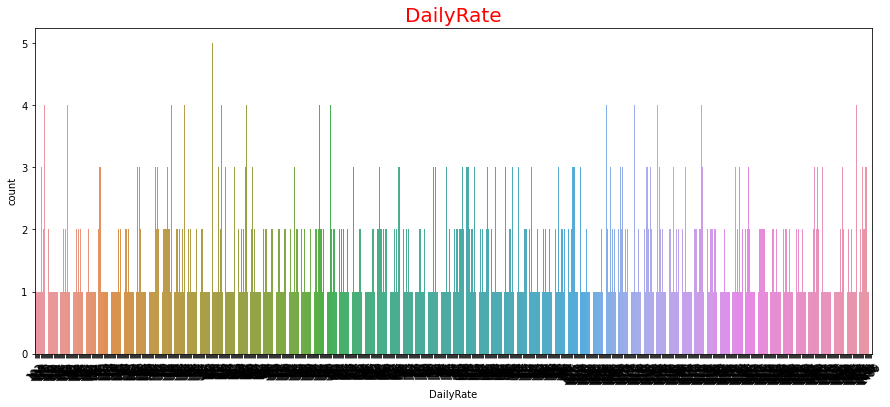

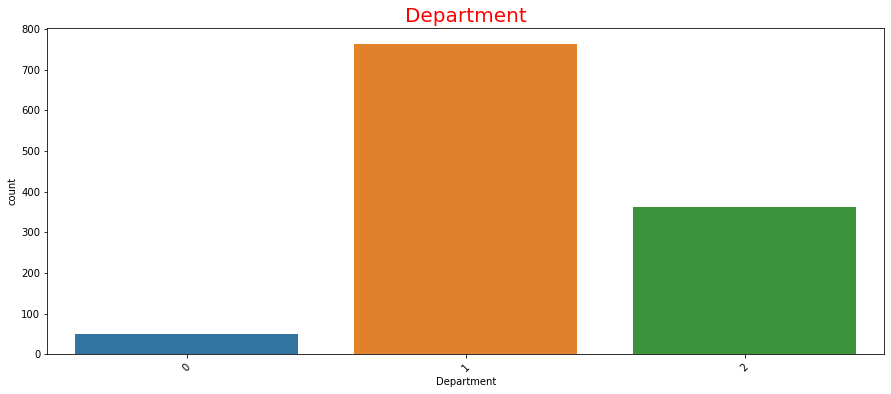

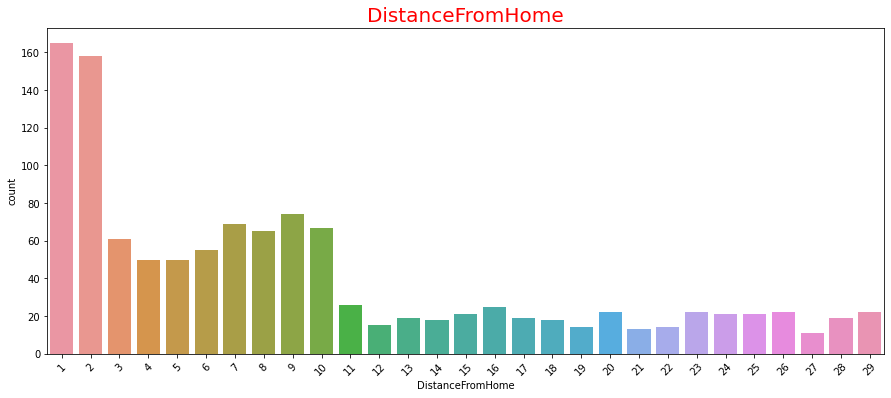

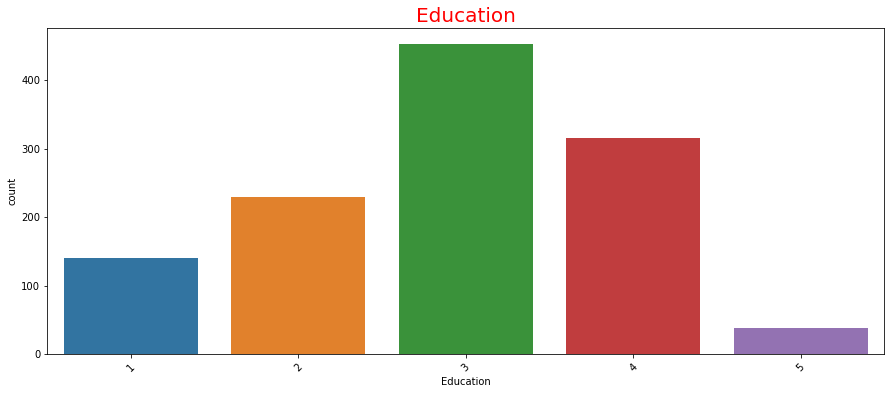

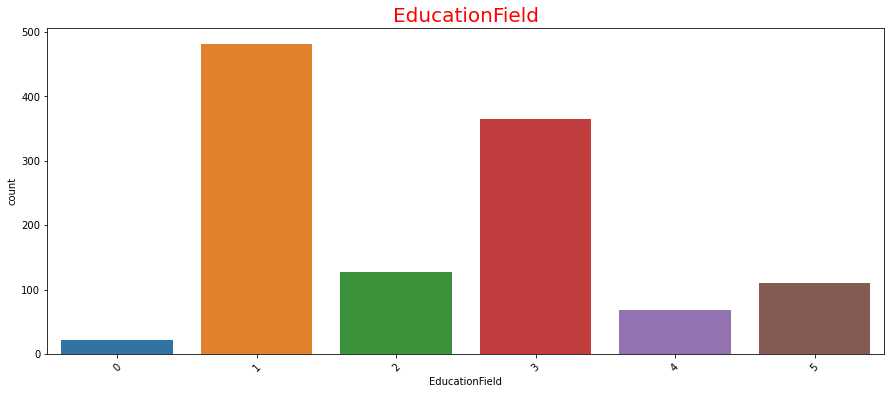

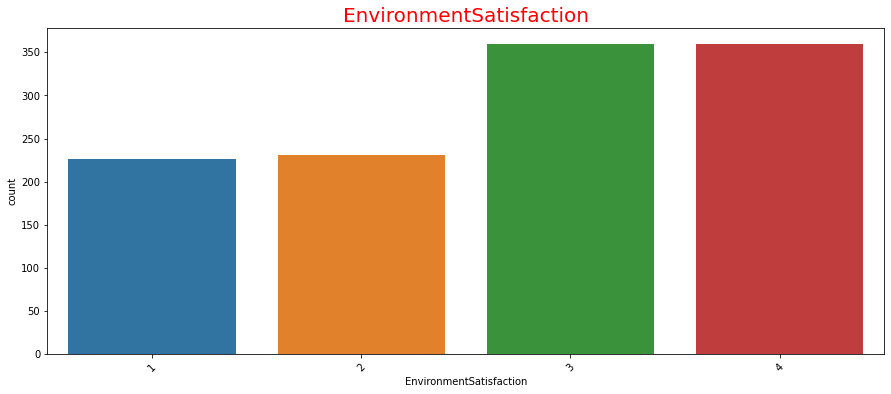

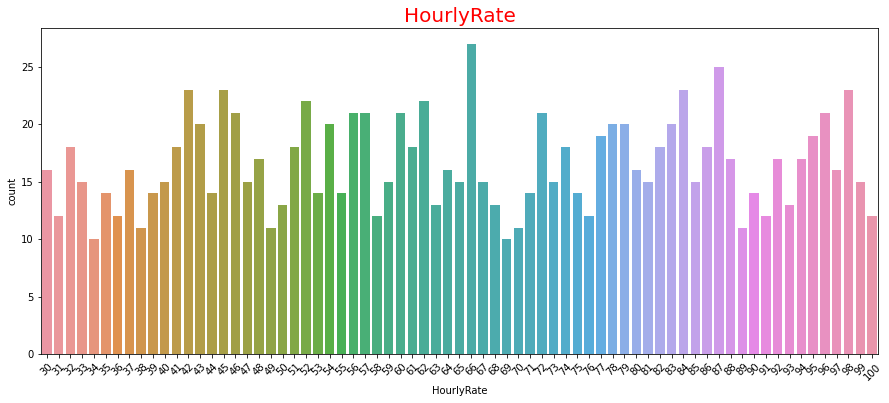

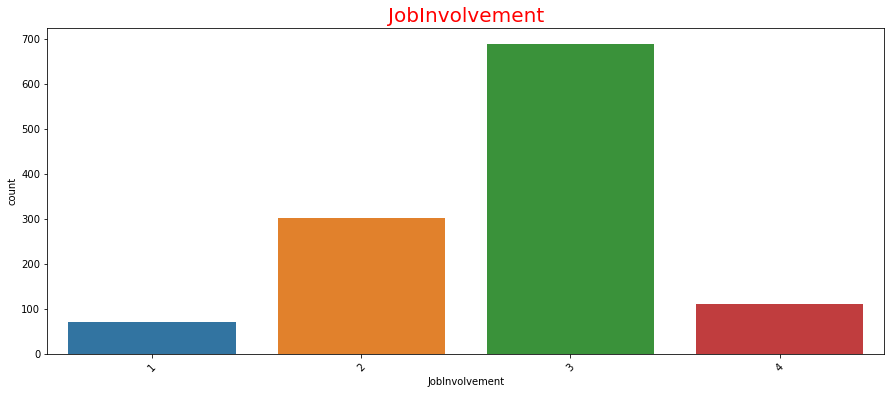

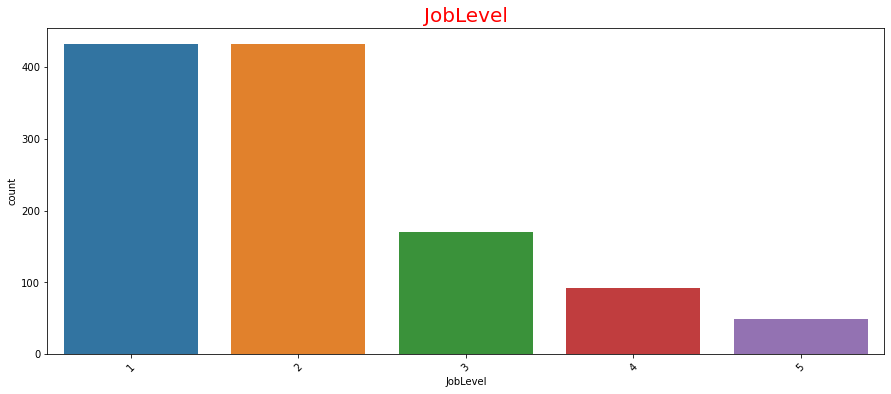

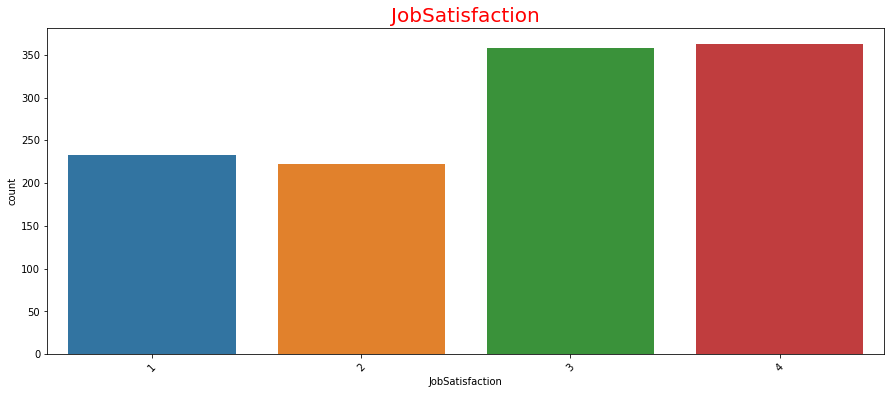

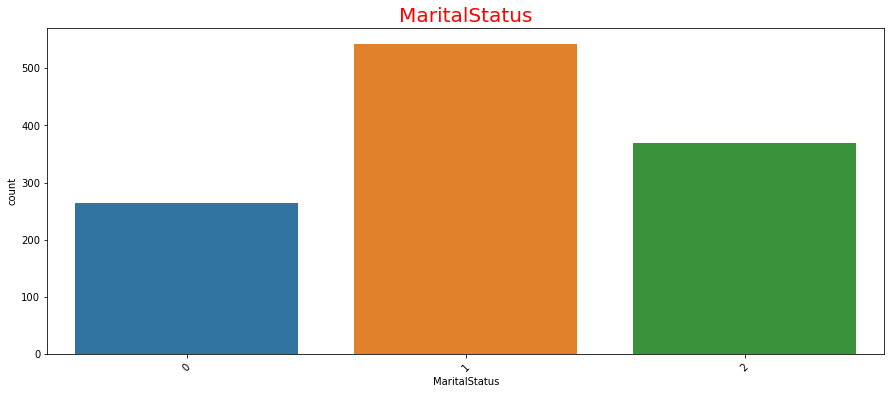

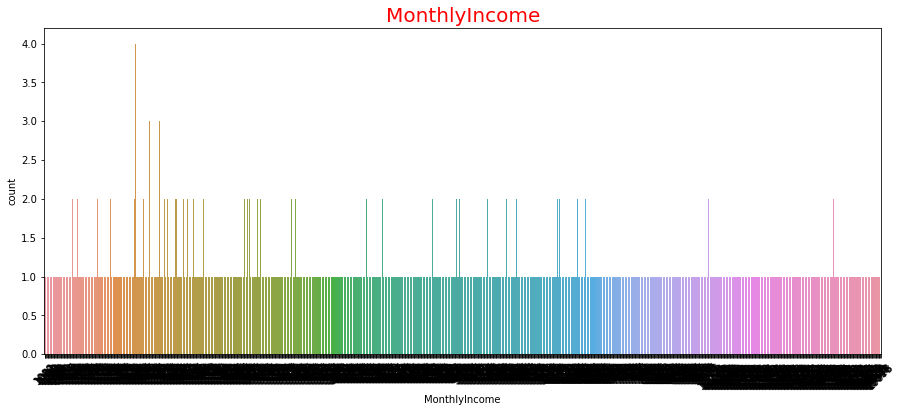

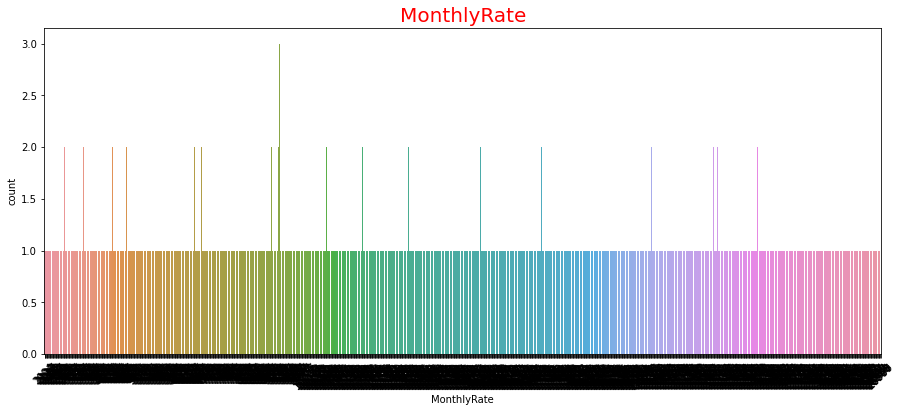

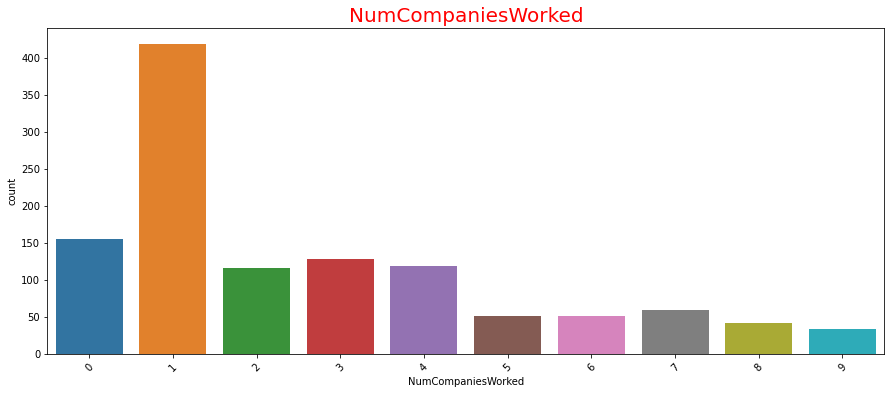

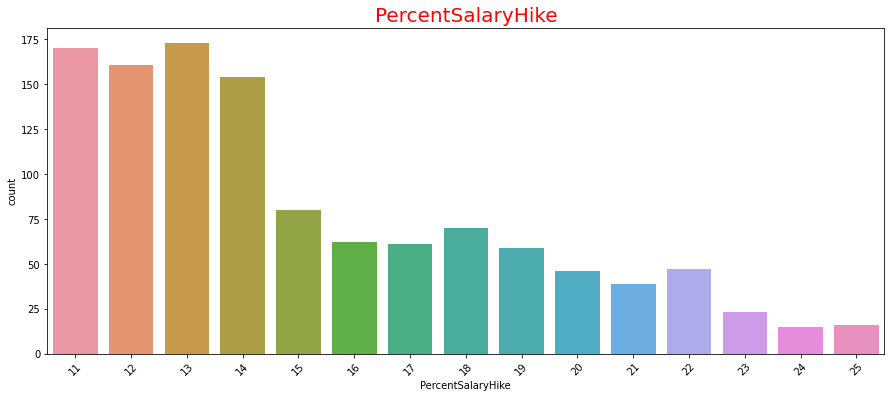

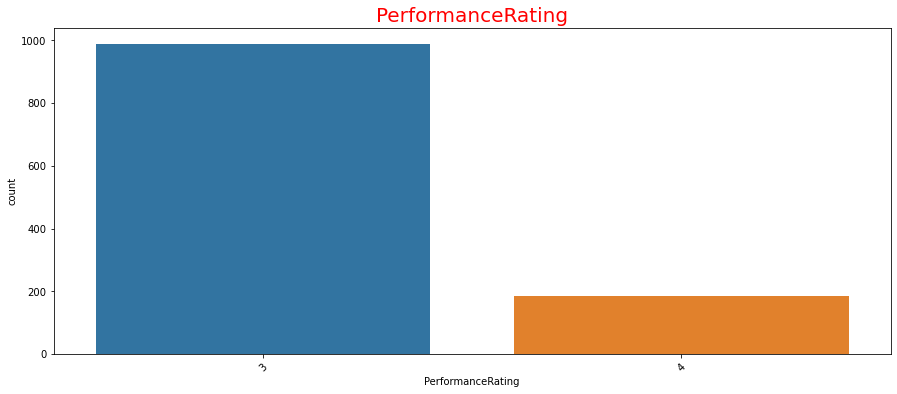

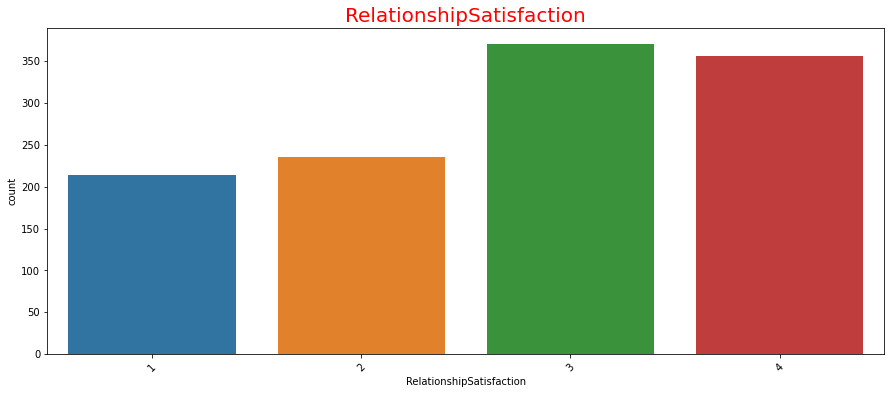

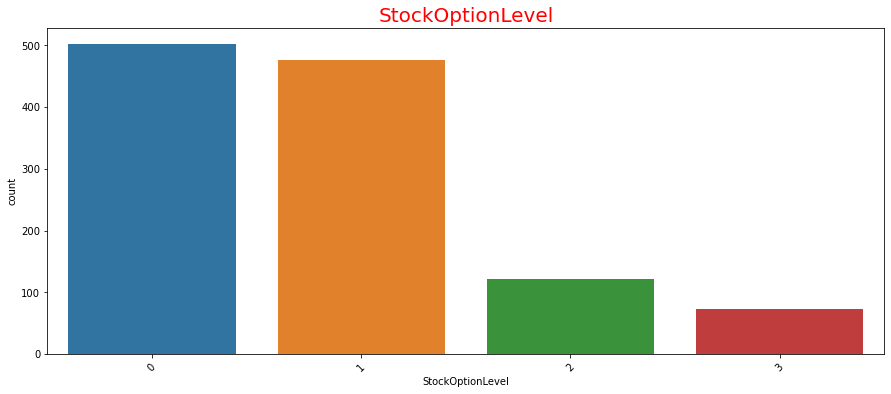

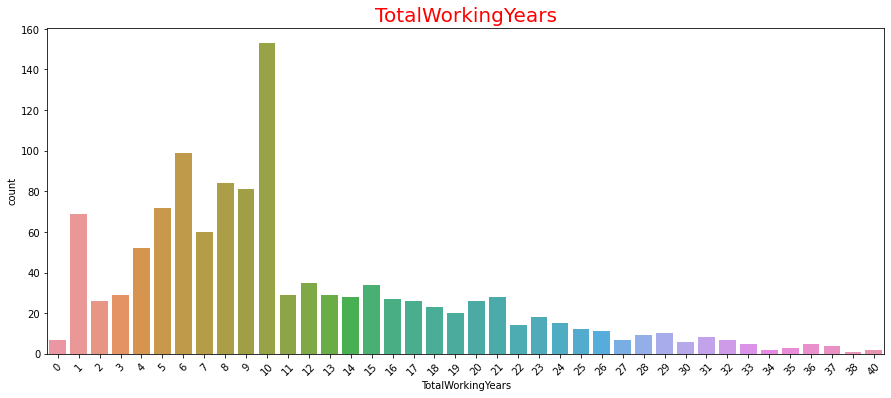

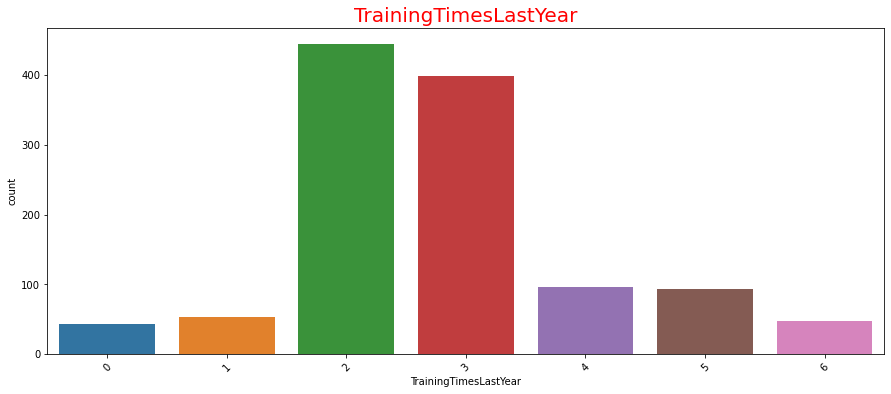

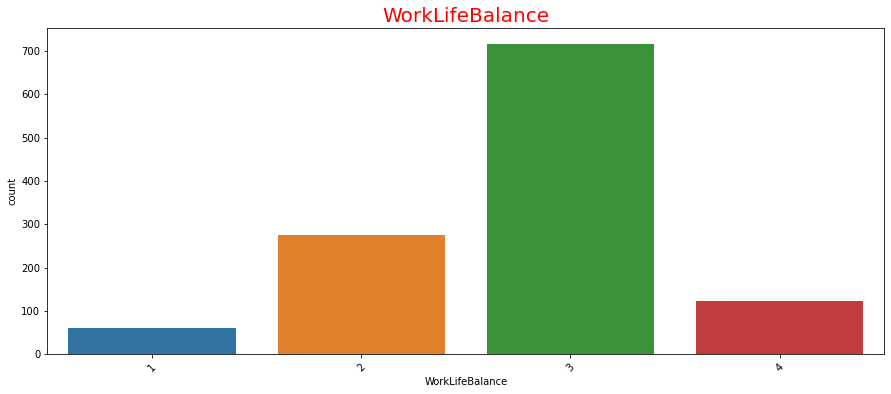

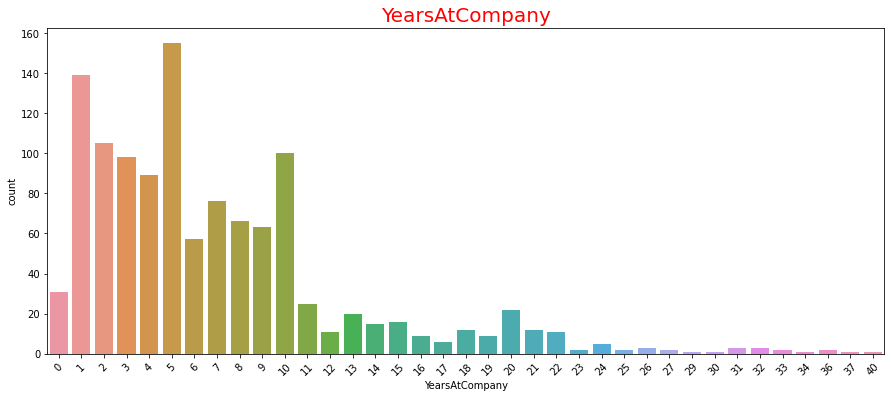

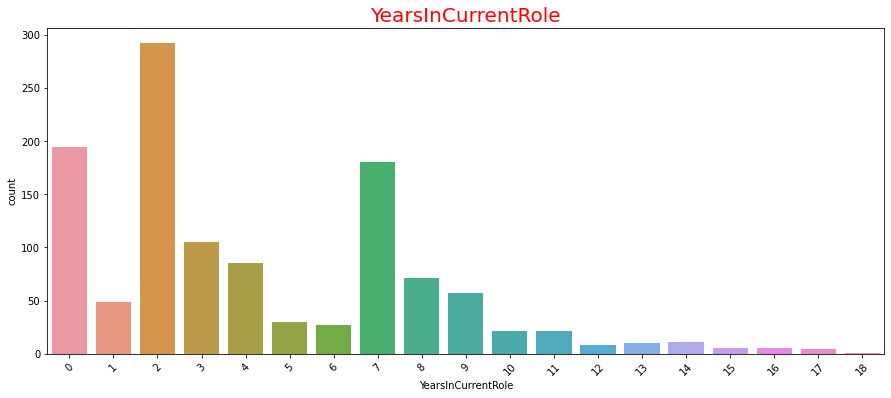

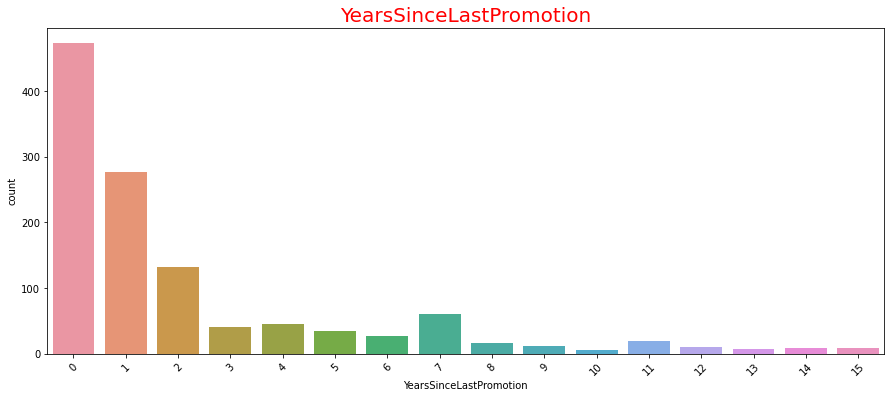

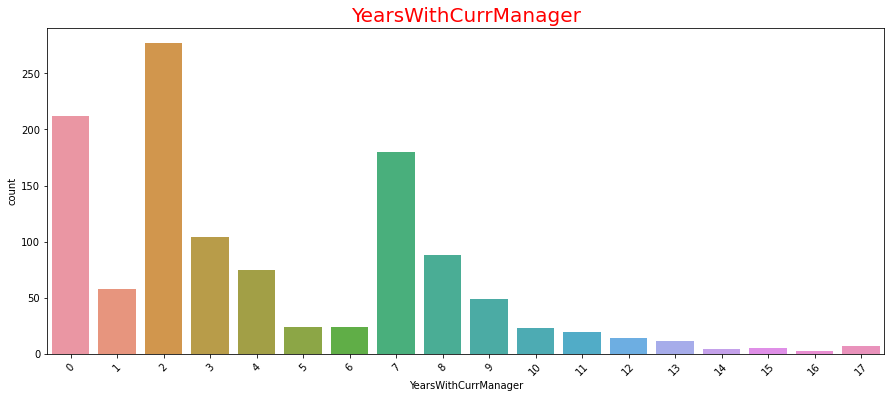

In [16]:
train_integers= train.dtypes[train.dtypes=="int64"].index.tolist()
for i in range(len(train_integers)):
    plt.figure(i,figsize=(15,6))
    plt.title(train_integers[i],color="red",fontsize=20)
    plt.xticks(rotation = 45)
    sns.countplot(x=train_integers[i], data=train)    

### Attrition - Feature ilişkileri

C:\Users\osman\AppData\Local\Temp/ipykernel_13556/1757143202.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i,figsize=(15,6))


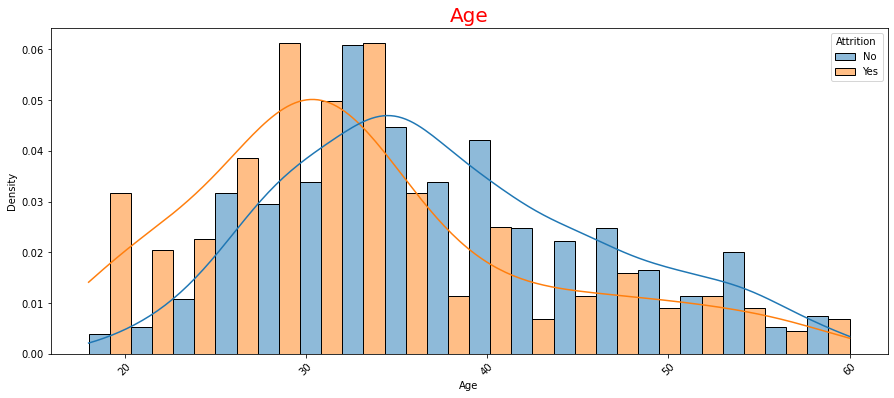

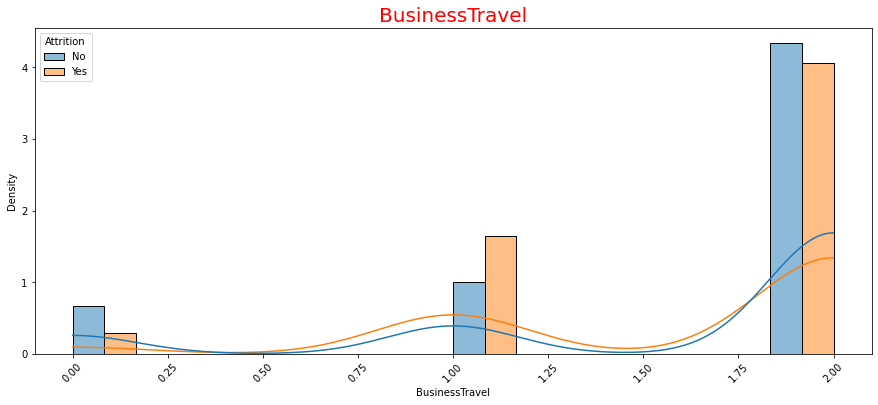

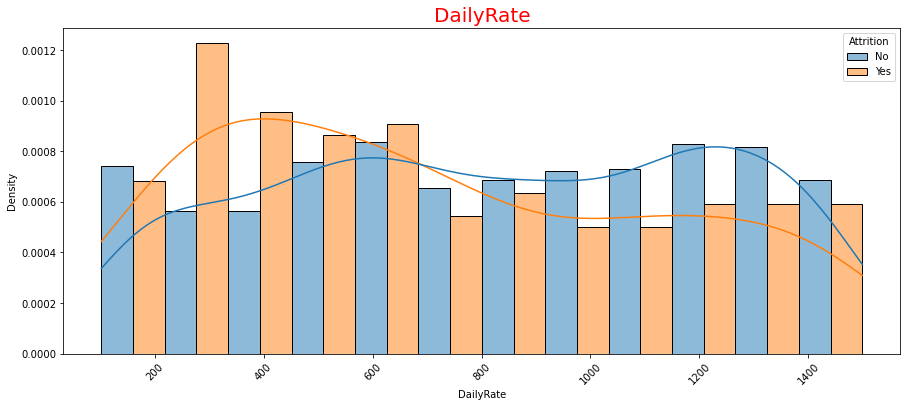

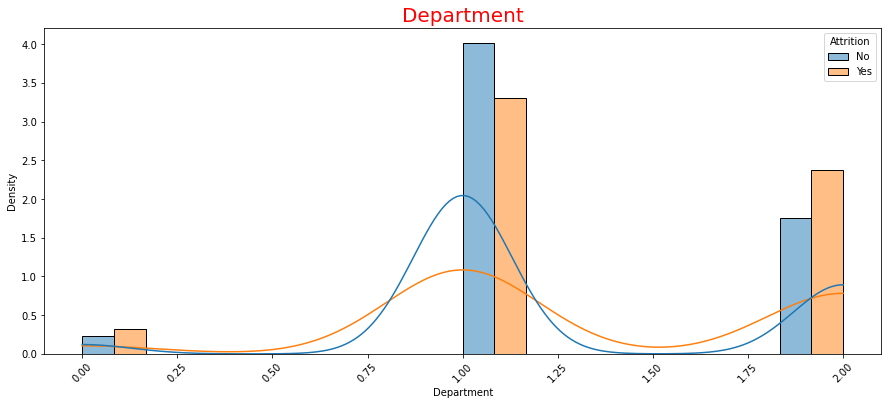

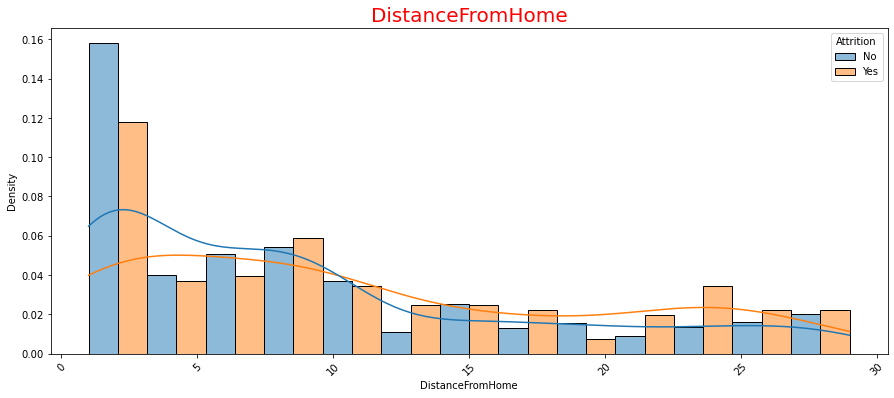

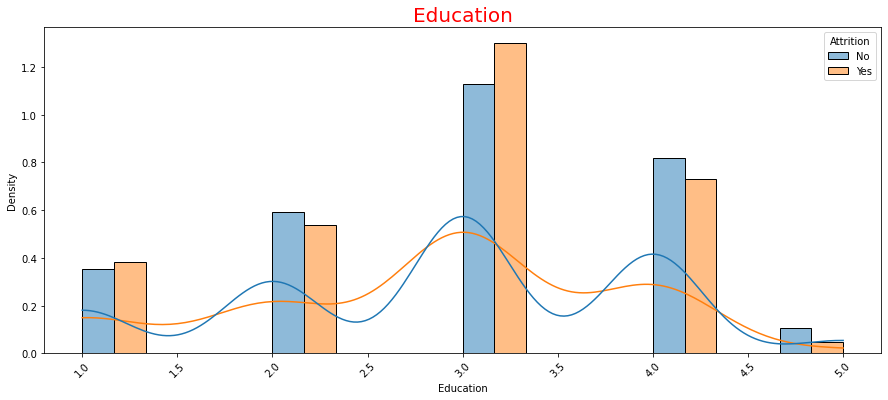

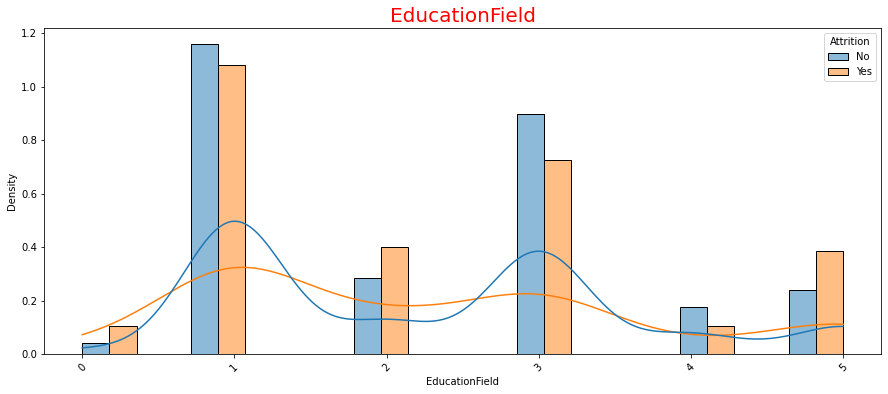

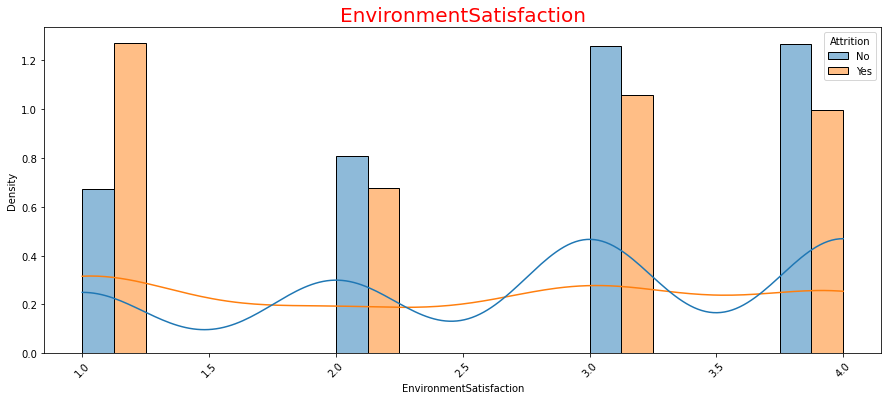

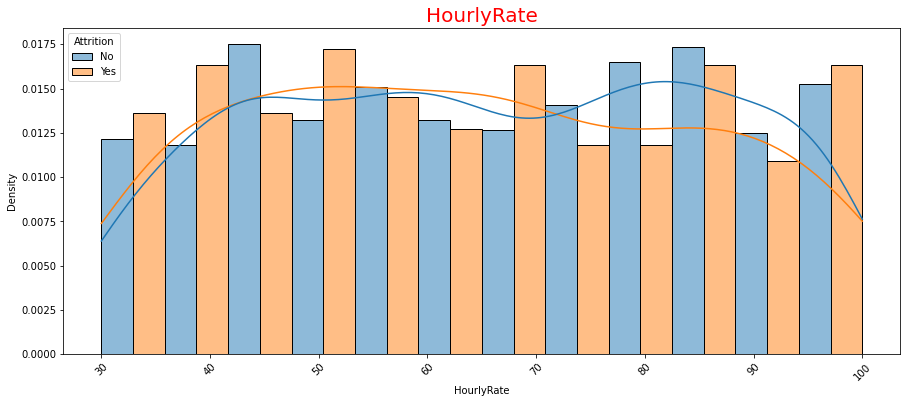

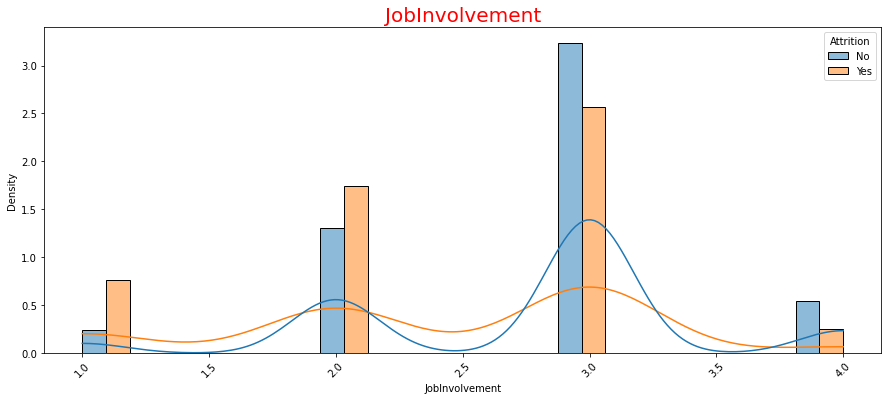

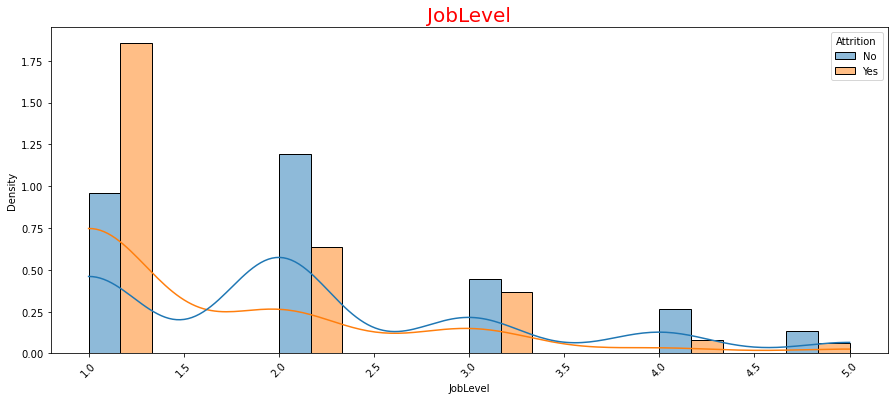

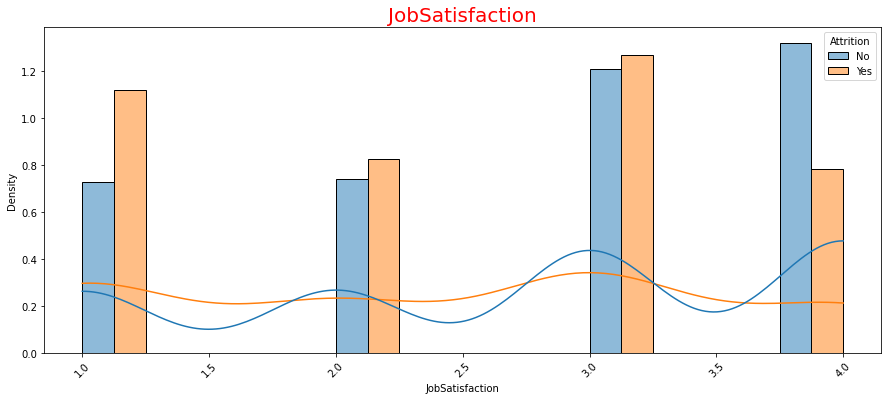

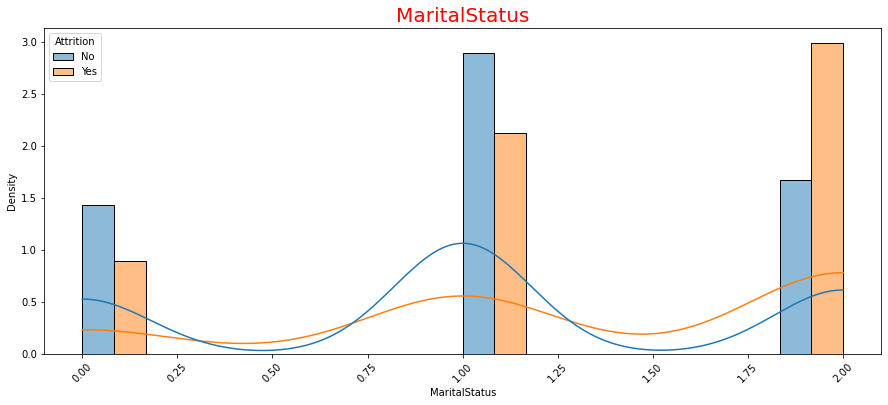

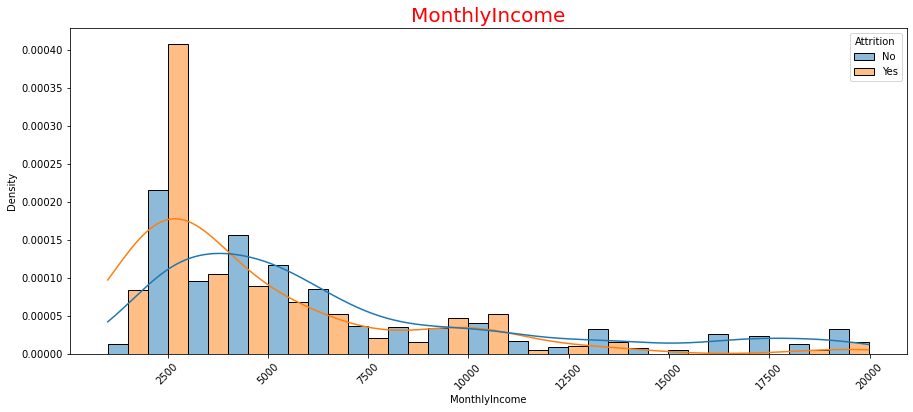

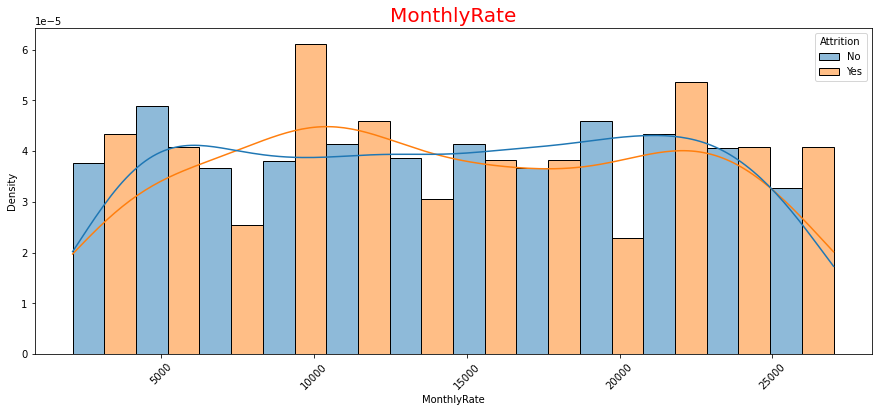

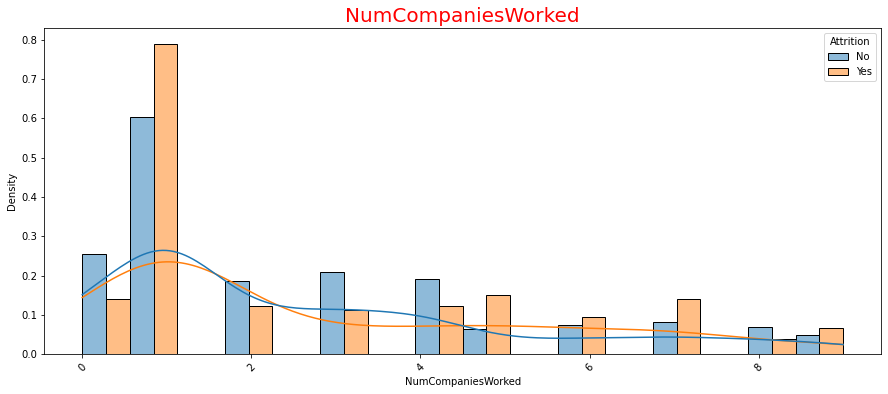

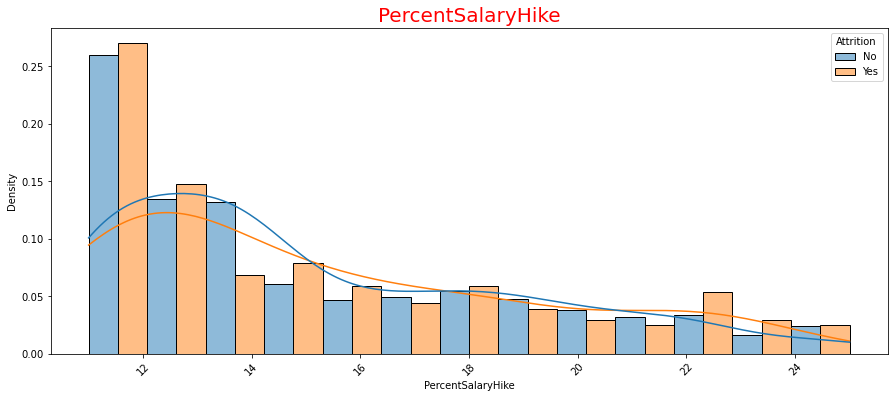

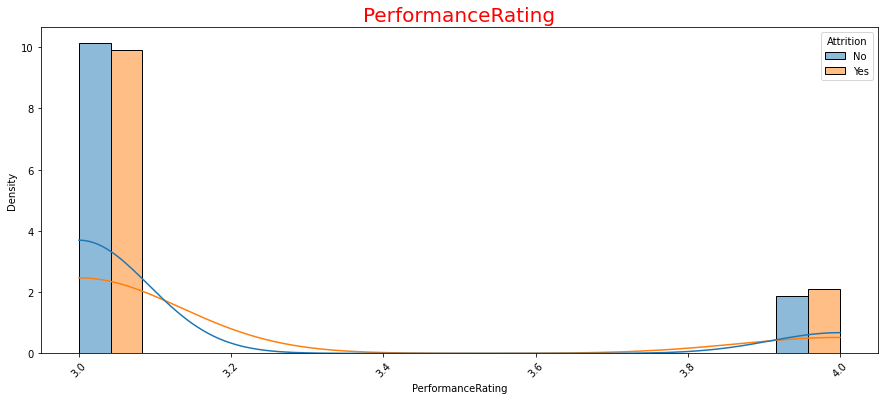

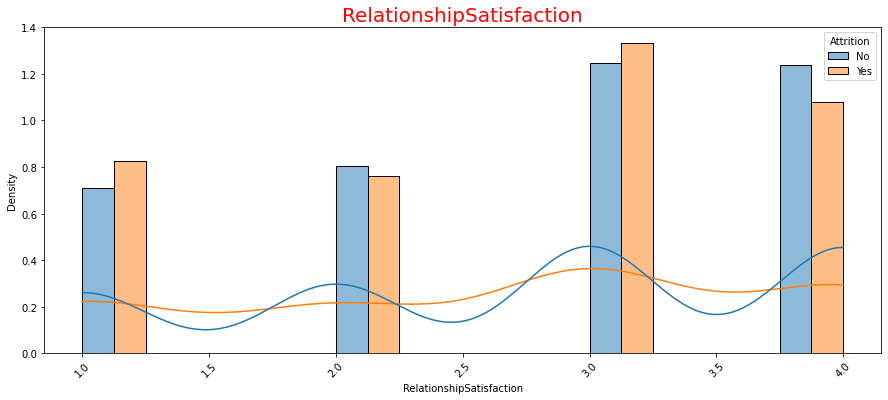

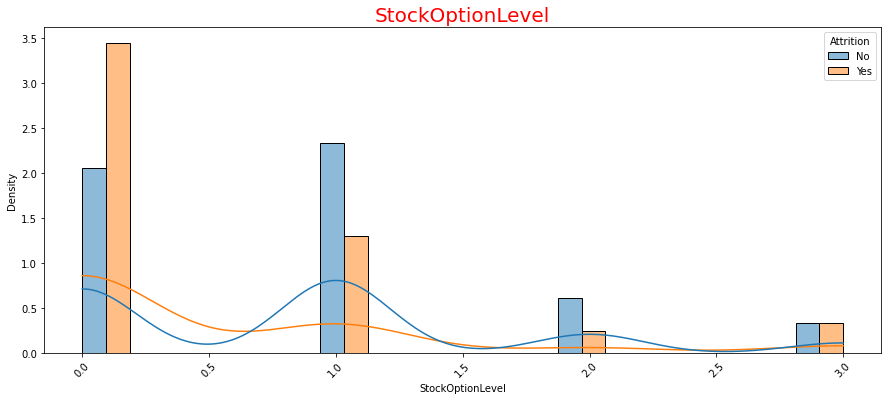

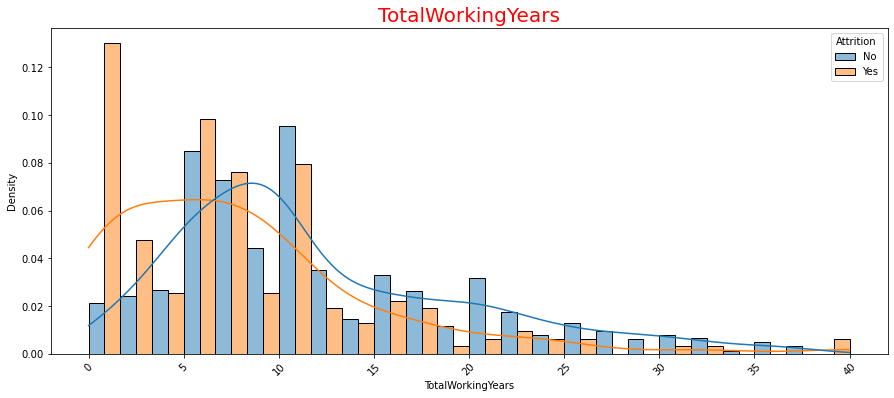

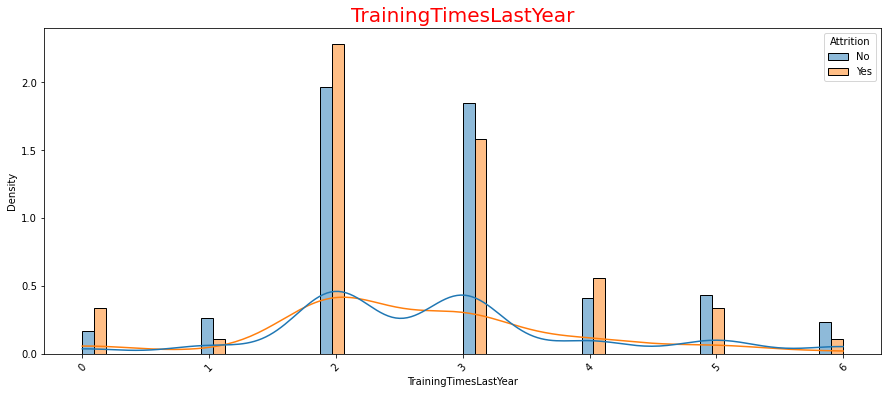

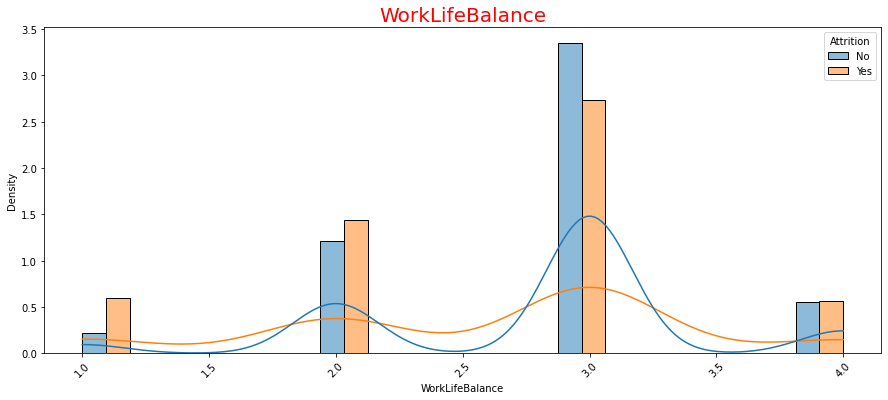

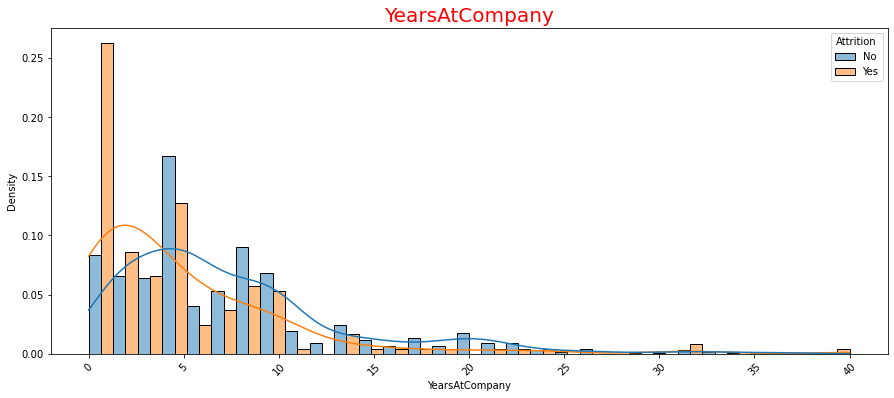

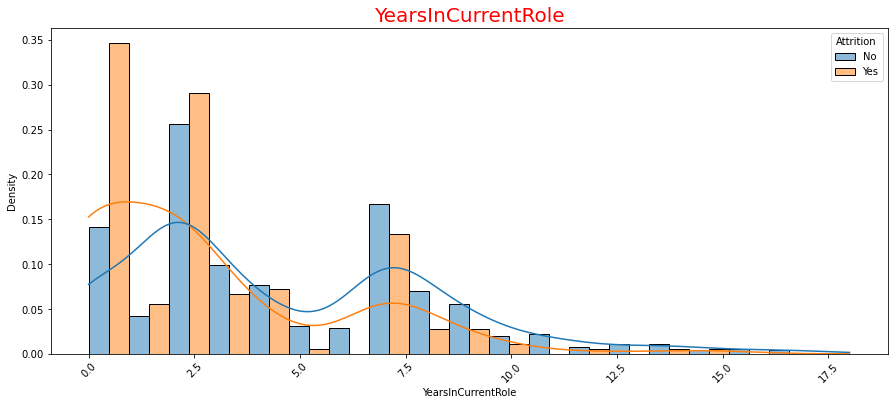

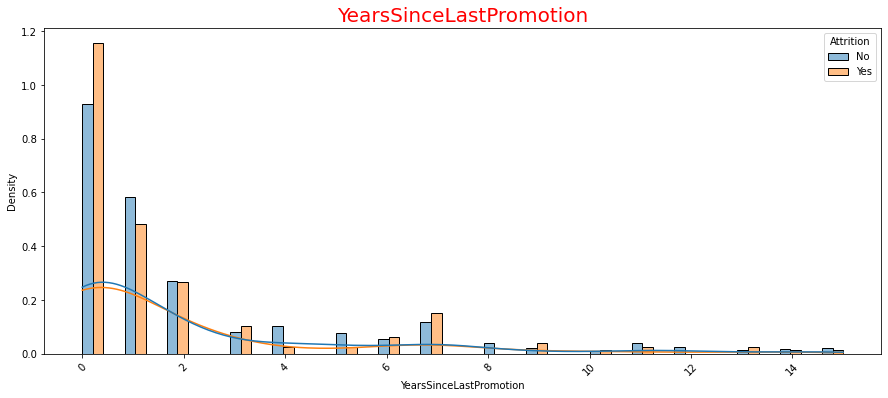

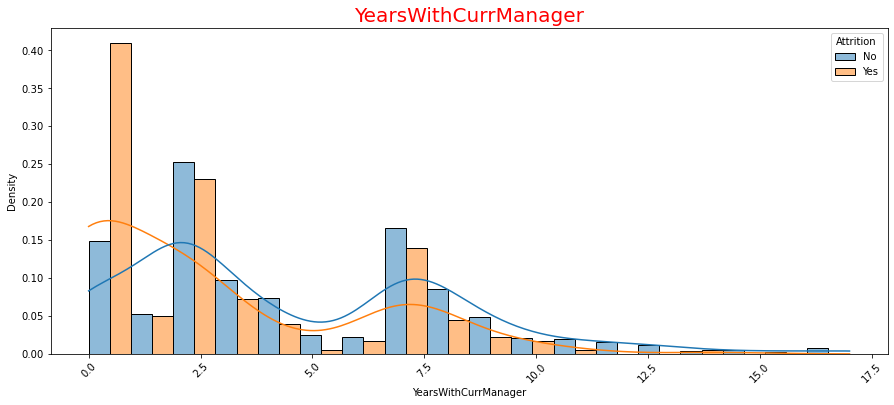

In [17]:
train_attirition= train.dtypes[train.dtypes=="int64"].index.tolist()
for i in range(len(train_attirition)):
    plt.figure(i,figsize=(15,6))
    plt.title(train_attirition[i],color="red",fontsize=20)
    plt.xticks(rotation = 45)
    sns.histplot(data=train, x=train_integers[i], kde=True, stat='density', multiple='dodge', common_norm=False, hue='Attrition')

In [18]:
# Deparmantların maaş dağılımları ve bu yerdeki kıadın - erkek maaş dağılımları

## Hafta 2 Başlangıcı 

In [19]:
train.head(1).to_dict()

{'Age': {0: 30},
 'BusinessTravel': {0: 2},
 'DailyRate': {0: 911},
 'Department': {0: 1},
 'DistanceFromHome': {0: 1},
 'Education': {0: 2},
 'EducationField': {0: 3},
 'EnvironmentSatisfaction': {0: 4},
 'Gender': {0: 'Male'},
 'HourlyRate': {0: 76},
 'JobInvolvement': {0: 3},
 'JobLevel': {0: 1},
 'JobRole': {0: 'Laboratory Technician'},
 'JobSatisfaction': {0: 2},
 'MaritalStatus': {0: 1},
 'MonthlyIncome': {0: 3748},
 'MonthlyRate': {0: 4077},
 'NumCompaniesWorked': {0: 1},
 'OverTime': {0: 'No'},
 'PercentSalaryHike': {0: 13},
 'PerformanceRating': {0: 3},
 'RelationshipSatisfaction': {0: 3},
 'StockOptionLevel': {0: 0},
 'TotalWorkingYears': {0: 12},
 'TrainingTimesLastYear': {0: 6},
 'WorkLifeBalance': {0: 2},
 'YearsAtCompany': {0: 12},
 'YearsInCurrentRole': {0: 8},
 'YearsSinceLastPromotion': {0: 1},
 'YearsWithCurrManager': {0: 7},
 'Attrition': {0: 'No'}}

In [55]:
# Geçen haftadan kalan eksikleri gidermek adına Gender, JobRole, Attrition ve OverTime sayısal değerlere dönüştürülmesi.

week2change=["Gender","JobRole","OverTime","Attrition"]
w2_name=[]
for i in range(len(week2change)):
    print(np.unique(train[week2change[i]]))
    change_w2 = np.unique(train[week2change[i]])
    w2_unique ={change_w2[i]: i for i in range(len(change_w2))}
    w2_name.append([change_w2,w2_unique])
    train[week2change[i]]=train[week2change[i]].map(w2_unique)
    print(Colors.YELLOW + str(week2change[i])+" : " + str(w2_unique) + Colors.END)                            


[0 1]
Gender : {0: 0, 1: 1}
[0 1 2 3 4 5 6 7 8]
JobRole : {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}
[0 1]
OverTime : {0: 0, 1: 1}
['No' 'Yes']
Attrition : {'No': 0, 'Yes': 1}


In [21]:
train.head(1).to_dict()

{'Age': {0: 30},
 'BusinessTravel': {0: 2},
 'DailyRate': {0: 911},
 'Department': {0: 1},
 'DistanceFromHome': {0: 1},
 'Education': {0: 2},
 'EducationField': {0: 3},
 'EnvironmentSatisfaction': {0: 4},
 'Gender': {0: 1},
 'HourlyRate': {0: 76},
 'JobInvolvement': {0: 3},
 'JobLevel': {0: 1},
 'JobRole': {0: 2},
 'JobSatisfaction': {0: 2},
 'MaritalStatus': {0: 1},
 'MonthlyIncome': {0: 3748},
 'MonthlyRate': {0: 4077},
 'NumCompaniesWorked': {0: 1},
 'OverTime': {0: 0},
 'PercentSalaryHike': {0: 13},
 'PerformanceRating': {0: 3},
 'RelationshipSatisfaction': {0: 3},
 'StockOptionLevel': {0: 0},
 'TotalWorkingYears': {0: 12},
 'TrainingTimesLastYear': {0: 6},
 'WorkLifeBalance': {0: 2},
 'YearsAtCompany': {0: 12},
 'YearsInCurrentRole': {0: 8},
 'YearsSinceLastPromotion': {0: 1},
 'YearsWithCurrManager': {0: 7},
 'Attrition': {0: 'No'}}

### Yeni niteliklerin yaratılması

<AxesSubplot:>

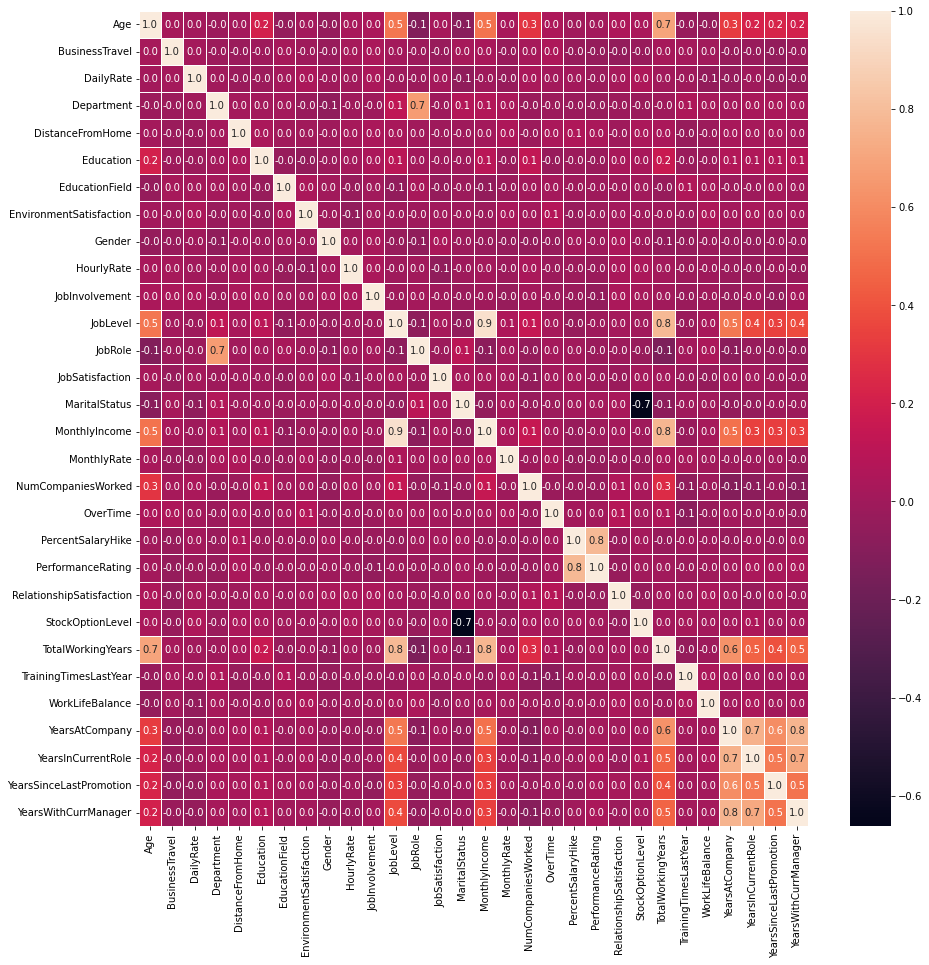

In [22]:
# Niteliklerin birbiri ile olan ilişkinin görselleştirilmesi ve daha anlamlı bir hale gelmesi için kolerasyon matrisi çizdirdik.
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Text(0.5, 1.0, 'MaritalStatus - DitanceFromHome')

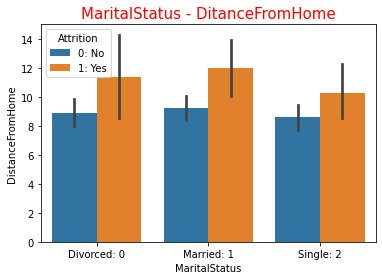

In [23]:
# DistanceFromHome: Cont
# MaritalStatus: Bin
# Attrition: Bin
labels=["0: No","1: Yes"]
_ = sns.barplot(data=train, x="MaritalStatus", y='DistanceFromHome', hue='Attrition')
_.legend_.get_texts()[0].set_text(labels[0])
_.legend_.get_texts()[1].set_text(labels[1])
_.set_xticklabels(["Divorced: 0", "Married: 1", "Single: 2"])
plt.title("MaritalStatus - DitanceFromHome",color="red",fontsize=15)
#plt.legend(loc='top right', title='Attrition',labels=labels)



Text(0.5, 1.0, 'Gender - MonthlyIncome')

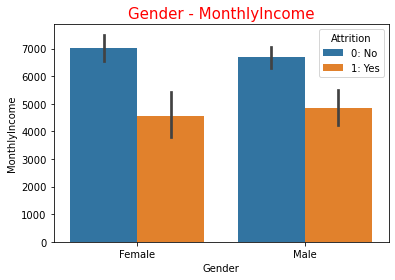

In [24]:
# Kadın-Erkek gelir dağılımının işe etkisi
labels=["0: No","1: Yes"]
_ = sns.barplot(data=train, x="Gender", y='MonthlyIncome', hue='Attrition')
_.legend_.get_texts()[0].set_text(labels[0])
_.legend_.get_texts()[1].set_text(labels[1])
_.set_xticklabels(["Female", "Male"])
plt.title("Gender - MonthlyIncome",color="red",fontsize=15)

Text(0.5, 1.0, 'MonthlyIncome')

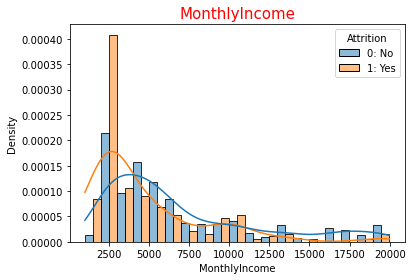

In [25]:
# Gelir dağılımının işe etkisi
labels=["0: No","1: Yes"]
_ = sns.histplot(data=train, x="MonthlyIncome", kde=True, stat='density', multiple='dodge', common_norm=False, hue='Attrition')
_.legend_.get_texts()[0].set_text(labels[0])
_.legend_.get_texts()[1].set_text(labels[1])
plt.title("MonthlyIncome",color="red",fontsize=15)

C:\Users\osman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

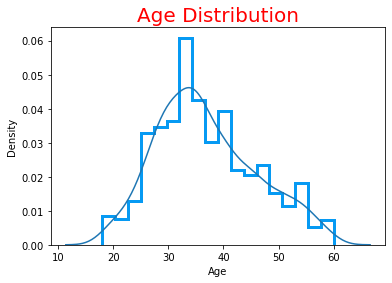

In [26]:
# Yaş aralığı

sns.distplot(train.Age, kde=True, label='YearsInCurrentRole', hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": sns.xkcd_rgb["azure"]})
plt.title('Age Distribution', fontsize=20,color="red")    

Text(0.5, 1.0, 'Gender - TotalWorkingYears - Attrition')

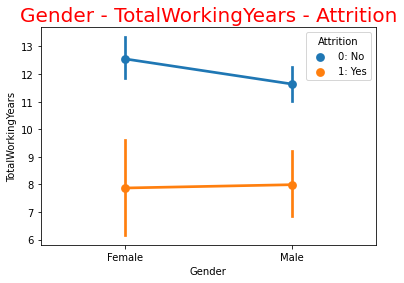

In [27]:
# Şirkette geçen yılların yıpranma ile ilişkisi
labels=["0: No","1: Yes"]
_=sns.pointplot(x="Gender", y="TotalWorkingYears", hue="Attrition", data=train);
_.legend_.get_texts()[0].set_text(labels[0])
_.legend_.get_texts()[1].set_text(labels[1])
_.set_xticklabels(["Female","Male"])
plt.title('Gender - TotalWorkingYears - Attrition', fontsize=20,color="red")    

In [28]:
print(Colors.PURPLE + str(train.dtypes) + Colors.END)

Age                          int64
BusinessTravel               int64
DailyRate                    int64
Department                   int64
DistanceFromHome             int64
Education                    int64
EducationField               int64
EnvironmentSatisfaction      int64
Gender                       int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                      int64
JobSatisfaction              int64
MaritalStatus                int64
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                     int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromot

## Hafta 3 Başlangıcı

In [29]:
# 22.03.2022
## Confusion Matrix - Önemli eğitlen modelin çıktısında olması gerek modelin ne kadar iyi eğitildiği ve sonuçlarını anlamak adına yararlı.
# InBalance durum var bunun çözülmesi gerek.Up-Down Sampling çözüm yöntemlerinden biri.
# Precision TP değerinin tüm pozitif tahminlere oranı, 
# REcall (sensitiviy),TP değerinin bütün pozitif örneklere oranı 
# Specificity TNdeğerinin bütün negatif örneklere oranı
# F-skoru : precision ve recall harmonik ortalaması

## ROC Curve : receiver operating characterşstşc curve(alıcı işleetim karaterisliği eğrisi)
# Bütün sınır değerlerindeki performans gösteriri
# TPR - True positive rate TP/TP+FN REcall
# TNR - True negative rate TN/TN+FP Precision
# AUC Score hesaplanıyor
# PR curve precision -recall curve


In [30]:
# Null değerlerin kontrol edilmesi.
train.isna().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int64

In [31]:
train.describe()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,36.859694,1.614796,804.922619,1.267007,9.329082,2.897959,2.263605,2.724490,0.604592,65.544218,...,3.158163,2.738946,0.801871,11.352041,2.784014,2.765306,7.034014,4.254252,2.173469,4.187925
std,9.115610,0.661721,402.627249,0.528474,8.109130,1.030495,1.345847,1.093398,0.489146,20.202669,...,0.365049,1.078555,0.862868,7.850857,1.267982,0.700896,6.122344,3.627904,3.217057,3.629603
min,18.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,30.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,466.750000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,48.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,65.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,2.000000,1163.250000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,83.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,60.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,100.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [32]:
train[["Gender","OverTime","BusinessTravel","Attrition"]].describe()

,Gender,OverTime,BusinessTravel
count,1176.000000,1176.000000,1176.000000
mean,0.604592,0.288265,1.614796
std,0.489146,0.453148,0.661721
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,2.000000
75%,1.000000,1.000000,2.000000
max,1.000000,1.000000,2.000000


In [33]:
# Attrition değerleri çok dengesiz 
# OverTime fazla, Travel az
# Kadınların sayısı daha fazla
# Gender : {'Female': 0, 'Male': 1}
train.groupby("Gender")["YearsSinceLastPromotion"].mean()


Gender
0    2.290323
1    2.097046
Name: YearsSinceLastPromotion, dtype: float64

In [34]:
# Performans - Cinsiyet
train.groupby("Gender")["PerformanceRating"].mean()

Gender
0    3.161290
1    3.156118
Name: PerformanceRating, dtype: float64

In [35]:
# Yıllara bağlı ortalama
train["MeanAttritionYear"] = train["TotalWorkingYears"] / (train["NumCompaniesWorked"] + 1)
train["MeanAttritionYear"].describe()

count    1176.000000
mean        4.184091
std         3.925013
min         0.000000
25%         1.666667
50%         3.000000
75%         5.000000
max        38.000000
Name: MeanAttritionYear, dtype: float64

In [36]:
# Kolerasyon matrixinde mutlak değerlerin çıkarılması

corr_matrix = train.corr().abs()
corr_matrix.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MeanAttritionYear
Age,1.000000,0.022214,0.007605,0.015537,0.016341,0.206040,0.044225,0.006536,0.041847,0.030195,...,0.046392,0.034225,0.696630,0.027291,0.041257,0.318787,0.220623,0.223889,0.206400,0.295667
BusinessTravel,0.022214,1.000000,0.018661,0.014714,0.023620,0.010265,0.019508,0.012711,0.029238,0.024735,...,0.046813,0.029442,0.023832,0.017404,0.001255,0.034996,0.026526,0.046143,0.025113,0.004673
DailyRate,0.007605,0.018661,1.000000,0.000317,0.023193,0.018384,0.014950,0.039596,0.005678,0.000717,...,0.021190,0.047563,0.001339,0.001705,0.050607,0.043454,0.004549,0.044023,0.040880,0.026561
Department,0.015537,0.014714,0.000317,1.000000,0.018403,0.009440,0.017025,0.027233,0.058741,0.000628,...,0.016468,0.023866,0.004213,0.051844,0.024571,0.014288,0.030702,0.036808,0.025730,0.004843
DistanceFromHome,0.016341,0.023620,0.023193,0.018403,1.000000,0.037325,0.000779,0.002459,0.005574,0.024361,...,0.001360,0.039247,0.033912,0.036950,0.014101,0.030099,0.024115,0.028280,0.012557,0.032326


In [37]:
# Kolerasyon üçgeninin oluşturulması

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

C:\Users\osman\AppData\Local\Temp/ipykernel_13556/2910995113.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MeanAttritionYear
Age,NaN,0.022214,0.007605,0.015537,0.016341,0.206040,0.044225,0.006536,0.041847,0.030195,...,0.046392,0.034225,0.696630,0.027291,0.041257,0.318787,0.220623,0.223889,0.206400,0.295667
BusinessTravel,NaN,NaN,0.018661,0.014714,0.023620,0.010265,0.019508,0.012711,0.029238,0.024735,...,0.046813,0.029442,0.023832,0.017404,0.001255,0.034996,0.026526,0.046143,0.025113,0.004673
DailyRate,NaN,NaN,NaN,0.000317,0.023193,0.018384,0.014950,0.039596,0.005678,0.000717,...,0.021190,0.047563,0.001339,0.001705,0.050607,0.043454,0.004549,0.044023,0.040880,0.026561
Department,NaN,NaN,NaN,NaN,0.018403,0.009440,0.017025,0.027233,0.058741,0.000628,...,0.016468,0.023866,0.004213,0.051844,0.024571,0.014288,0.030702,0.036808,0.025730,0.004843
DistanceFromHome,NaN,NaN,NaN,NaN,NaN,0.037325,0.000779,0.002459,0.005574,0.024361,...,0.001360,0.039247,0.033912,0.036950,0.014101,0.030099,0.024115,0.028280,0.012557,0.032326


In [56]:
Y_data = train['Attrition']
X_data = train.drop(columns=['Attrition'])

In [57]:
print(X_data.shape)
print(Y_data.shape)
assert X_data.shape[0] == Y_data.shape[0]

(1176, 31)
(1176,)


In [40]:
# Scaling
#from sklearn.preprocessing import StandardScaler
#scale = StandardScaler()
#scaled = scale.fit_transform(X)
#scaled = pd.DataFrame(scaled,columns=X.columns)

# Logistic Regression

In [41]:
from sklearn import metrics


def eval_clf(y_true, y_pred):
    acc = metrics.accuracy_score(y_true, y_pred)
    p = metrics.precision_score(y_true, y_pred)
    r = metrics.recall_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)
    
    result = {
        'acc': acc,
        'p': p,
        'r': r,
        'f1': f1
    }
    
    return result


def eval_auc(y_true, y_prob):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_prob)
    precision, recall, thresholds = metrics.precision_recall_curve(y_true, y_prob)
    
    roc_auc = metrics.auc(fpr, tpr)
    pr_auc = metrics.auc(recall, precision)
    
    result = {
        'roc_auc': roc_auc,
        'pr_auc': pr_auc
    }
    
    return result

    
def eval_threshold(y_true, y_prob, threshold):
    y_pred = np.where(np.array(y_prob) > threshold, 1, 0)

    return eval_clf(y_true, y_pred)

In [42]:
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=42)
X_data_sm, Y_data_sm = oversampler.fit_resample(X_data,    Y_data)

In [43]:
len(Y_data_sm)

1974

In [44]:
len(Y_data), len(X_data)

(1176, 1176)

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X_data,
    Y_data,
    test_size = 0.15,
    stratify=Y_data,
    random_state = 42
)

In [59]:
len(X_train), len(X_test), len(Y_train), len(Y_test )

(999, 177, 999, 177)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#classifier = LogisticRegression(max_iter=100000, random_state = 42,C= 1.0, solver= 'newton-cg')
#classifier.fit(X_train, Y_train)



In [60]:
params = {
    
    "C" : np.logspace(0, 4, 20),
    'solver' : ['liblinear',"newton-cg","lbfgs","sag","saga"]
    
}


lg_clf = LogisticRegression(penalty="l2",max_iter=1000,random_state=42)
lg_cv = GridSearchCV(lg_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)


lg_cv.fit(X_train, Y_train)
best_params = lg_cv.best_params_
print(f"Best parameters: {best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'C': 1.0, 'solver': 'newton-cg'})


C:\Users\osman\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\osman\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


In [49]:
#Y_pred = classifier.predict(X_test)
#Y_prob_2d = classifier.predict_proba(X_test)
#
#Y_prob = Y_prob_2d[:, 1]
#print('-' * 10)
#print('res_clf')
#res_clf = eval_clf(Y_test, Y_pred)
#print(res_clf)
#
#print('-' * 10)
#print('res_auc')
#res_auc = eval_auc(Y_test, Y_prob)
#print(res_auc)

In [61]:
lg_clf = LogisticRegression(**best_params)
lg_clf.fit(X_train, Y_train)


C:\Users\osman\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(solver='newton-cg')

Train Result:
Accuracy Score: 89.09%
PR AUC : 65.86%
ROC AUC Score: 72.17%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.905451    0.760000  0.890891    0.832725      0.882010
recall       0.971360    0.472050  0.890891    0.721705      0.890891
f1-score     0.937248    0.582375  0.890891    0.759812      0.880056
support    838.000000  161.000000  0.890891  999.000000    999.000000
_______________________________________________


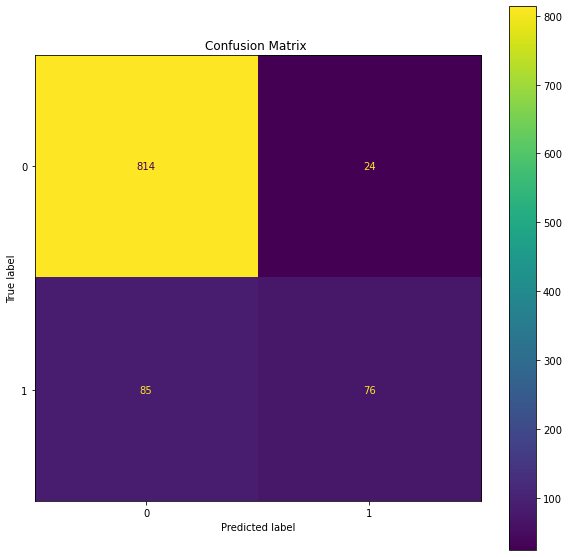

Test Result:
Accuracy Score: 84.75%
PR AUC : 46.60%
ROC AUC Score: 61.94%
________________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.876543   0.533333  0.847458    0.704938      0.822250
recall       0.953020   0.285714  0.847458    0.619367      0.847458
f1-score     0.913183   0.372093  0.847458    0.642638      0.827587
support    149.000000  28.000000  0.847458  177.000000    177.000000
________________________________________________
Confusion Matrix: 
 [[142   7]
 [ 20   8]]



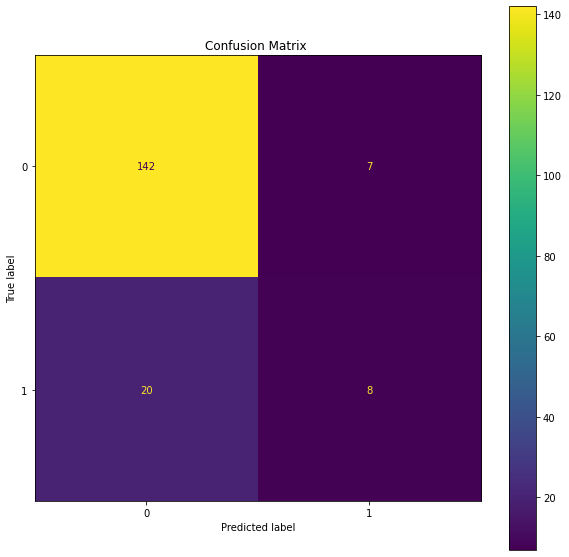

In [62]:
print_score(lg_clf, X_train, Y_train, X_test, Y_test, train=True)
print_score(lg_clf, X_train, Y_train, X_test, Y_test, train=False)

In [ ]:
#ypo, dpo, threshold = metrics.roc_curve(Y_test, lg_clf.predict(X_test))
#roc_auc = metrics.auc(ypo, dpo)


In [ ]:
#from sklearn.metrics import accuracy_score
#accuracy=accuracy_score(Y_pred, Y_test)
#print(Colors.YELLOW + 'Linear Regression Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test, Y_pred)) + Colors.END)

In [ ]:
#eval_threshold(Y_test, Y_prob, threshold=0.3)

In [ ]:
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import ConfusionMatrixDisplay
#
#cm =confusion_matrix(Y_test,classifier.predict(X_test))
#classes = ["0","1"]
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                              display_labels=classes)
#fig, ax = plt.subplots(figsize=(10,10))
#plt.title("Confusion Matrix - Logistic Regression")
#disp = disp.plot(ax=ax)
#plt.show()

In [63]:
import pickle
from sklearn.metrics import RocCurveDisplay
with open("logistic_reg.pkl","wb") as file:
    pickle.dump(lg_clf,file)


##  Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
params = {
    
    "n_estimators" : list(range(10,100,10)),
    "criterion" : ("gini","entropy"),
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
    
}


rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)


rf_cv.fit(X_train, Y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params})")

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 70})


Train Result:
Accuracy Score: 97.70%
PR AUC : 94.01%
ROC AUC Score: 92.86%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.973287    1.000000  0.976977    0.986643      0.977592
recall       1.000000    0.857143  0.976977    0.928571      0.976977
f1-score     0.986463    0.923077  0.976977    0.954770      0.976247
support    838.000000  161.000000  0.976977  999.000000    999.000000
_______________________________________________


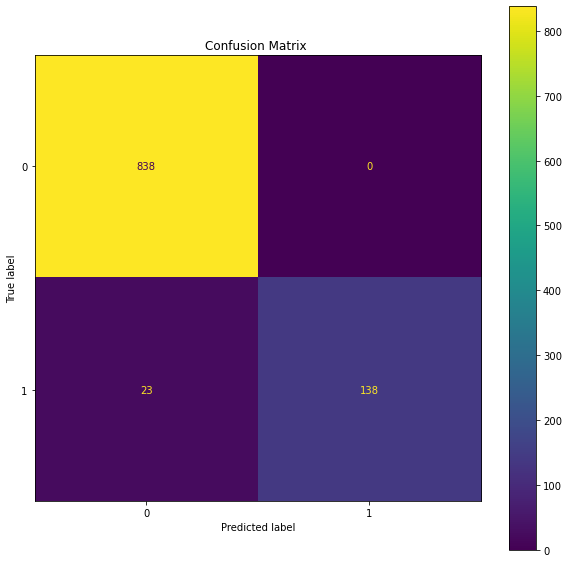

Test Result:
Accuracy Score: 83.62%
PR AUC : 36.14%
ROC AUC Score: 55.47%
________________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.857143   0.444444  0.836158    0.650794      0.791857
recall       0.966443   0.142857  0.836158    0.554650      0.836158
f1-score     0.908517   0.216216  0.836158    0.562367      0.799001
support    149.000000  28.000000  0.836158  177.000000    177.000000
________________________________________________
Confusion Matrix: 
 [[144   5]
 [ 24   4]]



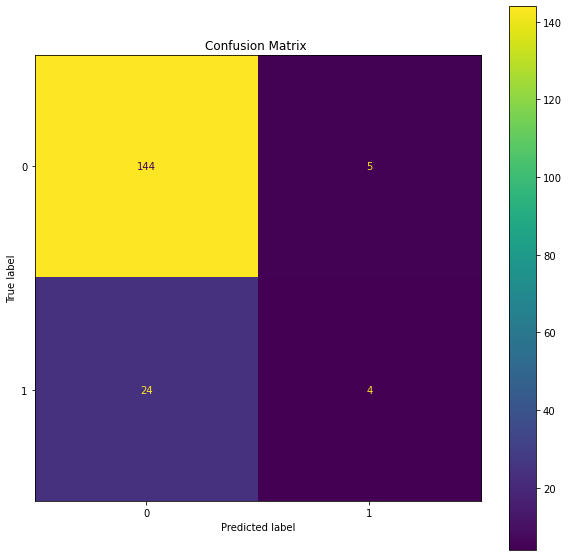

In [65]:
rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, Y_train)
print_score(rf_clf, X_train, Y_train, X_test, Y_test, train=True)
print_score(rf_clf, X_train, Y_train, X_test, Y_test, train=False)

In [ ]:
# Y_pred = random_forest.predict(X_test)
# Y_prob_2d = random_forest.predict_proba(X_test)

# Y_prob = Y_prob_2d[:, 1]
# print('-' * 10)
# print('res_clf')
# res_clf = eval_clf(Y_test, Y_pred)
# print(res_clf)

# print('-' * 10)
# print('res_auc')
# res_auc = eval_auc(Y_test, Y_prob)
# print(res_auc)

In [ ]:
# from sklearn.metrics import accuracy_score
# accuracy=accuracy_score(Y_pred, Y_test)
# print(Colors.YELLOW + 'RandomForest Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test, Y_pred)) + Colors.END)

In [ ]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import ConfusionMatrixDisplay

# cm =confusion_matrix(Y_test,random_forest.predict(X_test))
# classes = ["0","1"]
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels=classes)
# fig, ax = plt.subplots(figsize=(10,10))
# plt.title("Confusion Matrix - RandomForest")
# disp = disp.plot(ax=ax)
# plt.show()

In [66]:
import pickle
from sklearn.metrics import RocCurveDisplay
with open("random_forest.pkl","wb") as file:
    pickle.dump(rf_cv,file)



## LightBGM

In [67]:
# LBGM https://lightgbm.readthedocs.io/en/latest/Python-Intro.html
from lightgbm import LGBMClassifier
param = {'num_leaves': 31, 'objective': 'binary'}
param['metric'] = 'auc'
lgbm = LGBMClassifier(n_estimators =10000,verbose=-1,random_state=42).fit(X_train,Y_train)

Y_pred = lgbm.predict(X_test)
Y_prob_2d = lgbm.predict_proba(X_test)

Y_prob = Y_prob_2d[:, 1]
print('-' * 10)
print('res_clf')
res_clf = eval_clf(Y_test, Y_pred)
print(res_clf)

print('-' * 10)
print('res_auc')
res_auc = eval_auc(Y_test, Y_prob)
print(res_auc)


----------
res_clf
{'acc': 0.847457627118644, 'p': 0.5238095238095238, 'r': 0.39285714285714285, 'f1': 0.4489795918367347}
----------
res_auc
{'roc_auc': 0.7641418983700863, 'pr_auc': 0.44393464305697355}


In [ ]:
#from sklearn.metrics import accuracy_score
#accuracy=accuracy_score(Y_pred, Y_test)
#print(Colors.YELLOW + 'LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test, Y_pred)) + Colors.END)

In [ ]:
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import ConfusionMatrixDisplay
#
#cm =confusion_matrix(Y_test,lgbm.predict(X_test))
#classes = ["0","1"]
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                              display_labels=classes)
#fig, ax = plt.subplots(figsize=(10,10))
#plt.title("Confusion Matrix - LGBM")
#disp = disp.plot(ax=ax)
#plt.show()

Train Result:
Accuracy Score: 100.00%
PR AUC : 100.00%
ROC AUC Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    838.0  161.0       1.0      999.0         999.0
_______________________________________________


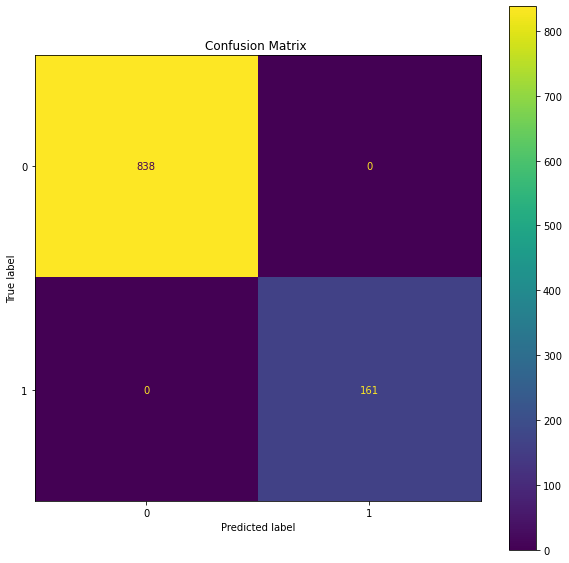

Test Result:
Accuracy Score: 84.75%
PR AUC : 50.64%
ROC AUC Score: 66.29%
________________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.891026   0.523810  0.847458    0.707418      0.832935
recall       0.932886   0.392857  0.847458    0.662872      0.847458
f1-score     0.911475   0.448980  0.847458    0.680228      0.838312
support    149.000000  28.000000  0.847458  177.000000    177.000000
________________________________________________
Confusion Matrix: 
 [[139  10]
 [ 17  11]]



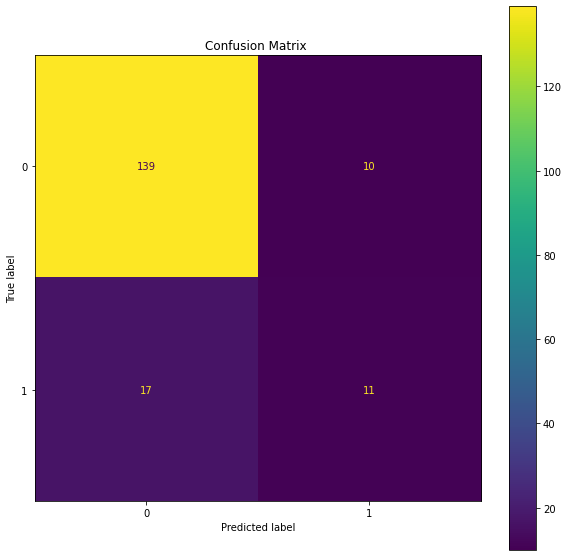

In [68]:
print_score(lgbm, X_train, Y_train, X_test, Y_test, train=True)
print_score(lgbm, X_train, Y_train, X_test, Y_test, train=False)

In [69]:
import pickle
from sklearn.metrics import RocCurveDisplay
with open("lbgm.pkl","wb") as file:
    pickle.dump(lgbm,file)

## XGBOOST

In [70]:
# XGBOOST
from xgboost  import XGBClassifier
xboost = XGBClassifier(n_estimators =10000,random_state=42).fit(X_train,Y_train)

Y_pred = xboost.predict(X_test)
Y_prob_2d = xboost.predict_proba(X_test)

Y_prob = Y_prob_2d[:, 1]
print('-' * 10)
print('res_clf')
res_clf = eval_clf(Y_test, Y_pred)
print(res_clf)

print('-' * 10)
print('res_auc')
res_auc = eval_auc(Y_test, Y_prob)
print(res_auc)


C:\Users\osman\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:28:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
----------
res_clf
{'acc': 0.8361581920903954, 'p': 0.4782608695652174, 'r': 0.39285714285714285, 'f1': 0.4313725490196078}
----------
res_auc
{'roc_auc': 0.7569511025886865, 'pr_auc': 0.47826119279929075}


In [ ]:
# from sklearn.metrics import accuracy_score
# accuracy=accuracy_score(Y_pred, Y_test)
# print(Colors.YELLOW + 'XBOOST Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test, Y_pred)) + Colors.END)

In [ ]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import ConfusionMatrixDisplay

# cm =confusion_matrix(Y_test,xboost.predict(X_test))
# classes = ["0","1"]
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels=classes)
# fig, ax = plt.subplots(figsize=(10,10))
# plt.title("Confusion Matrix - XBOOST")
# disp = disp.plot(ax=ax)
# plt.show()

Train Result:
Accuracy Score: 100.00%
PR AUC : 100.00%
ROC AUC Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    838.0  161.0       1.0      999.0         999.0
_______________________________________________


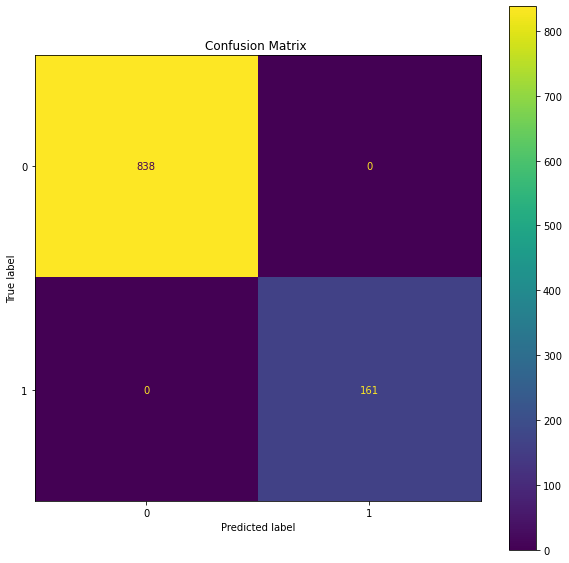

Test Result:
Accuracy Score: 83.62%
PR AUC : 48.36%
ROC AUC Score: 65.62%
________________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.889610   0.478261  0.836158    0.683936      0.824538
recall       0.919463   0.392857  0.836158    0.656160      0.836158
f1-score     0.904290   0.431373  0.836158    0.667831      0.829479
support    149.000000  28.000000  0.836158  177.000000    177.000000
________________________________________________
Confusion Matrix: 
 [[137  12]
 [ 17  11]]



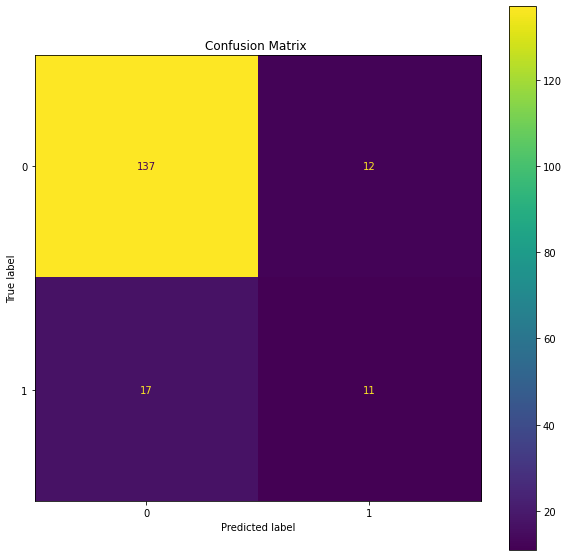

In [71]:
print_score(xboost, X_train, Y_train, X_test, Y_test, train=True)
print_score(xboost, X_train, Y_train, X_test, Y_test, train=False)

In [72]:
import pickle
from sklearn.metrics import RocCurveDisplay
with open("xboost.pkl","wb") as file:
    pickle.dump(xboost,file)

## Linear Discriminant Analysis

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA().fit(X_train,Y_train)

Y_pred = lda.predict(X_test)
Y_prob_2d = lda.predict_proba(X_test)

Y_prob = Y_prob_2d[:, 1]
print('-' * 10)
print('res_clf')
res_clf = eval_clf(Y_test, Y_pred)
print(res_clf)

print('-' * 10)
print('res_auc')
res_auc = eval_auc(Y_test, Y_prob)
print(res_auc)

----------
res_clf
{'acc': 0.8587570621468926, 'p': 0.5882352941176471, 'r': 0.35714285714285715, 'f1': 0.4444444444444445}
----------
res_auc
{'roc_auc': 0.815196548418025, 'pr_auc': 0.4979483347393504}


In [ ]:
#from sklearn.metrics import accuracy_score
#accuracy=accuracy_score(Y_pred, Y_test)
#print(Colors.YELLOW + 'LDA Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test, Y_pred)) + Colors.END)

In [ ]:
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import ConfusionMatrixDisplay

#cm =confusion_matrix(Y_test,lda.predict(X_test))
#classes = ["0","1"]
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                              display_labels=classes)
#fig, ax = plt.subplots(figsize=(10,10))
#plt.title("Confusion Matrix - LDA")
#disp = disp.plot(ax=ax)
#plt.show()

Train Result:
Accuracy Score: 88.29%
PR AUC : 62.81%
ROC AUC Score: 70.69%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.901001    0.720000  0.882883    0.810501      0.871831
recall       0.966587    0.447205  0.882883    0.706896      0.882883
f1-score     0.932642    0.551724  0.882883    0.742183      0.871253
support    838.000000  161.000000  0.882883  999.000000    999.000000
_______________________________________________


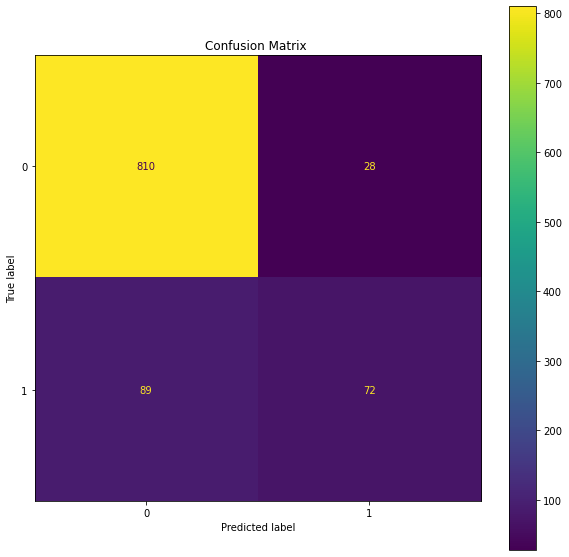

Test Result:
Accuracy Score: 85.88%
PR AUC : 52.35%
ROC AUC Score: 65.51%
________________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.887500   0.588235  0.858757    0.737868      0.840159
recall       0.953020   0.357143  0.858757    0.655081      0.858757
f1-score     0.919094   0.444444  0.858757    0.681769      0.844008
support    149.000000  28.000000  0.858757  177.000000    177.000000
________________________________________________
Confusion Matrix: 
 [[142   7]
 [ 18  10]]



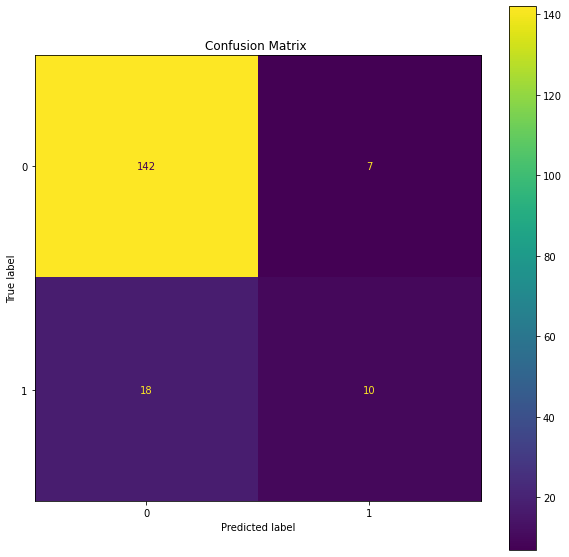

In [74]:
print_score(lda, X_train, Y_train, X_test, Y_test, train=True)
print_score(lda, X_train, Y_train, X_test, Y_test, train=False)

In [75]:
import pickle
from sklearn.metrics import RocCurveDisplay
with open("lda.pkl","wb") as file:
    pickle.dump(lda,file)

## Decision Tree 

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)

tree_cv.fit(X_train, Y_train)
best_params = tree_cv.best_params_
print(f"Best parameters: {best_params})")




Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 8, 'min_samples_split': 2, 'splitter': 'random'})


In [77]:
tree_clf = DecisionTreeClassifier(**best_params,random_state=42)
tree_clf.fit(X_train, Y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=8,
                       random_state=42, splitter='random')

Train Result:
Accuracy Score: 88.79%
PR AUC : 64.78%
ROC AUC Score: 72.24%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.906040    0.733333  0.887888    0.819687      0.878207
recall       0.966587    0.478261  0.887888    0.722424      0.887888
f1-score     0.935335    0.578947  0.887888    0.757141      0.877899
support    838.000000  161.000000  0.887888  999.000000    999.000000
_______________________________________________


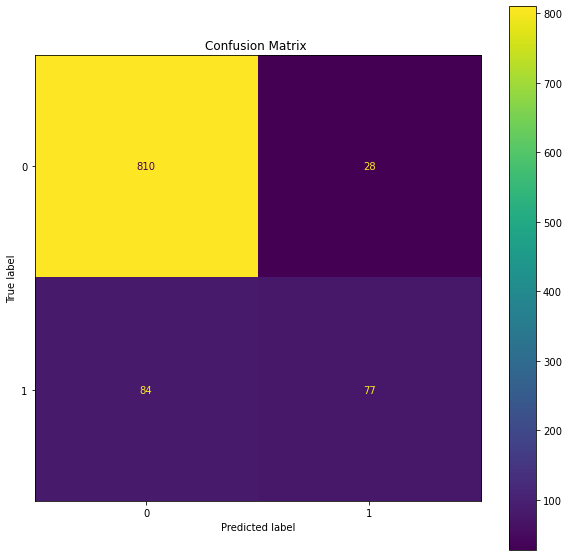

Test Result:
Accuracy Score: 83.05%
PR AUC : 43.94%
ROC AUC Score: 62.38%
________________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.878981   0.450000  0.830508    0.664490      0.811120
recall       0.926174   0.321429  0.830508    0.623802      0.830508
f1-score     0.901961   0.375000  0.830508    0.638480      0.818600
support    149.000000  28.000000  0.830508  177.000000    177.000000
________________________________________________
Confusion Matrix: 
 [[138  11]
 [ 19   9]]



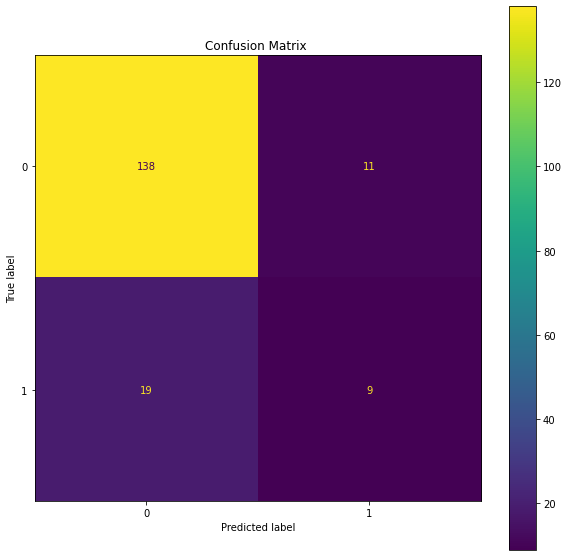

In [78]:
print_score(tree_clf, X_train, Y_train, X_test, Y_test, train=True)
print_score(tree_clf, X_train, Y_train, X_test, Y_test, train=False)

In [79]:
import pickle
from sklearn.metrics import RocCurveDisplay
with open("tree.pkl","wb") as file:
    pickle.dump(tree_clf,file)

# StandardScaler

In [ ]:
# SVM kernel trick// gussian rbf// deision tree//gbm

In [81]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.fit_transform(X_test)


In [82]:
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf",random_state=42,probability=True)
classifier.fit(X_train_scaled,Y_train)

SVC(probability=True, random_state=42)

In [83]:
Y_pred = classifier.predict(X_test_scaled)
Y_prob_2d = classifier.predict_proba(X_test_scaled)

Y_prob = Y_prob_2d[:, 1]
print('-' * 10)
print('res_clf')
res_clf = eval_clf(Y_test, Y_pred)
print(res_clf)

print('-' * 10)
print('res_auc')
res_auc = eval_auc(Y_test, Y_prob)
print(res_auc)

----------
res_clf
{'acc': 0.8587570621468926, 'p': 0.6, 'r': 0.32142857142857145, 'f1': 0.41860465116279066}
----------
res_auc
{'roc_auc': 0.8027325023969318, 'pr_auc': 0.4341282953706606}


Train Result:
Accuracy Score: 93.69%
PR AUC : 83.13%
ROC AUC Score: 80.94%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.931996    0.980392  0.936937    0.956194      0.939795
recall       0.997613    0.621118  0.936937    0.809366      0.936937
f1-score     0.963689    0.760456  0.936937    0.862073      0.930936
support    838.000000  161.000000  0.936937  999.000000    999.000000
_______________________________________________


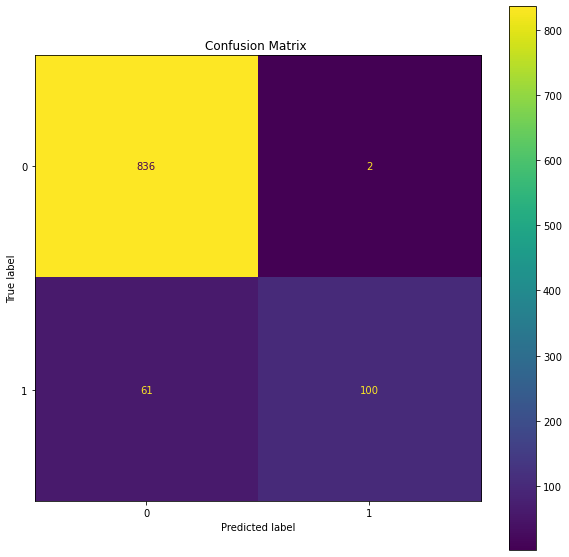

Test Result:
Accuracy Score: 85.88%
PR AUC : 51.44%
ROC AUC Score: 64.06%
________________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.882716   0.600000  0.858757    0.741358      0.837993
recall       0.959732   0.321429  0.858757    0.640580      0.858757
f1-score     0.919614   0.418605  0.858757    0.669109      0.840358
support    149.000000  28.000000  0.858757  177.000000    177.000000
________________________________________________
Confusion Matrix: 
 [[143   6]
 [ 19   9]]



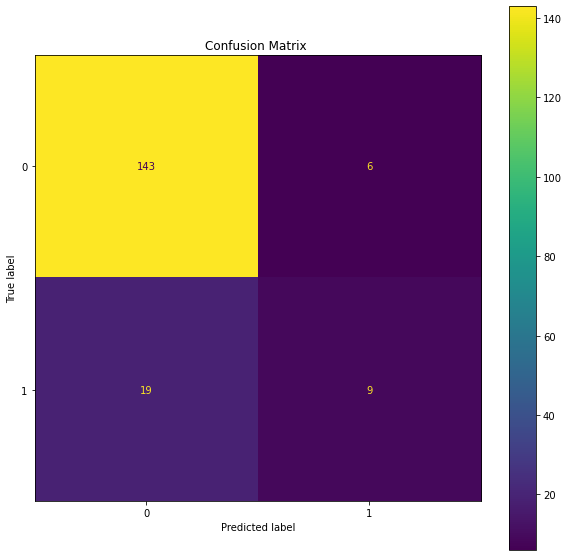

In [84]:
print_score(classifier, X_train_scaled, Y_train, X_test_scaled, Y_test, train=True)
print_score(classifier, X_train_scaled, Y_train, X_test_scaled, Y_test, train=False)

In [85]:
import pickle
from sklearn.metrics import RocCurveDisplay
with open("scaler.pkl","wb") as file:
    pickle.dump(classifier,file)

In [ ]:
#hyperparameter optimization ss aldım 

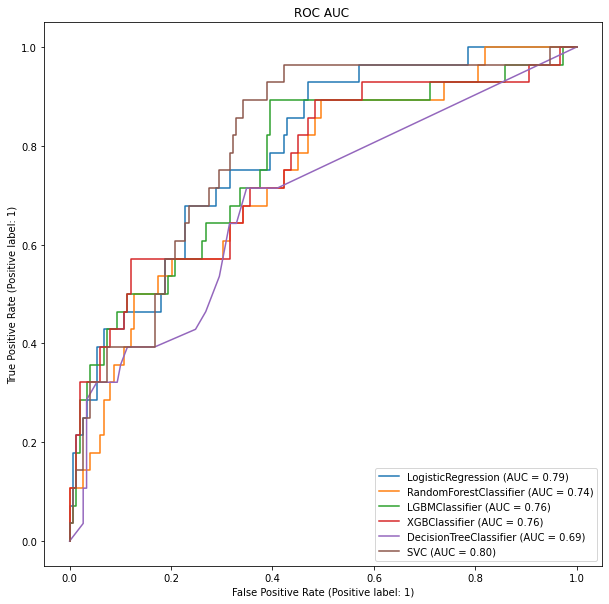

In [86]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title("ROC AUC ")
RocCurveDisplay.from_estimator(lg_clf, X_test, Y_test,ax=ax)
RocCurveDisplay.from_estimator(rf_clf, X_test, Y_test,ax=ax)
RocCurveDisplay.from_estimator(lgbm, X_test, Y_test,ax=ax)
RocCurveDisplay.from_estimator(xboost, X_test, Y_test,ax=ax)
RocCurveDisplay.from_estimator(tree_clf, X_test, Y_test,ax=ax)
RocCurveDisplay.from_estimator(classifier, X_test_scaled, Y_test,ax=ax)

plt.show()